In [1]:
# importing packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sb

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# ignore error warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#### Steps followed in Analysis
1. Loading and understanding data
2. EDA - Univariate and Bivariate analysis
3. Data Preprocessing
4. Model building
5. Model evaluation
6. Regularization using Lasso & Ridge regression

### Step 1: Load and understanding data

In [3]:

# There are some columns that have default NA values from datadictionary. These need to be treated before we do null value treatment
df = pd.read_csv('train.csv', keep_default_na=False)

df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [4]:
# Check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [5]:
# Replacing all 'NA' of all above mentioned columns by 'Not applicable'
df = df.replace("NA", "Not applicable")
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street           Alley  \
0   1          60       RL          65     8450   Pave  Not applicable   
1   2          20       RL          80     9600   Pave  Not applicable   
2   3          60       RL          68    11250   Pave  Not applicable   
3   4          70       RL          60     9550   Pave  Not applicable   
4   5          60       RL          84    14260   Pave  Not applicable   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          Gd             8        Typ           0   
1             1          TA             6        Typ           1   
2             1          Gd             6        Typ           1   
3             1          Gd            

In [6]:
# Datatype changes
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [8]:
df.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.00

In [9]:
# CHECK FOR MISSING VALUES

df.isna().sum()

# Findings
# MasVnrArea and LotFrontage have missing values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

### EDA: Univariate Analysis

<Axes: xlabel='SalePrice', ylabel='Density'>

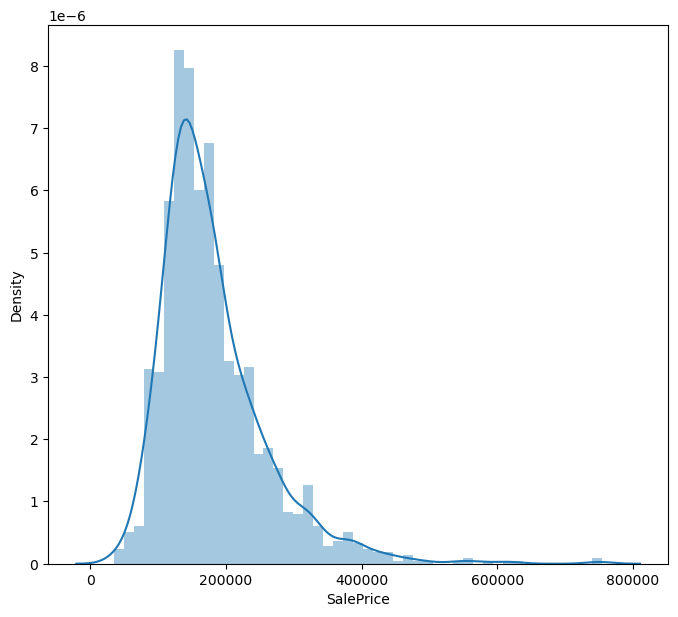

In [10]:
#Analysing the target variable

plt.figure(figsize=[8,7])
sb.distplot(df['SalePrice'])

# Findings: Dataset has a long tail towards the right hence right skewed

0.12133506220520406
0.8095319958036296
-0.02037671523503421
0.8976549705443784


<Axes: xlabel='SalePrice', ylabel='Density'>

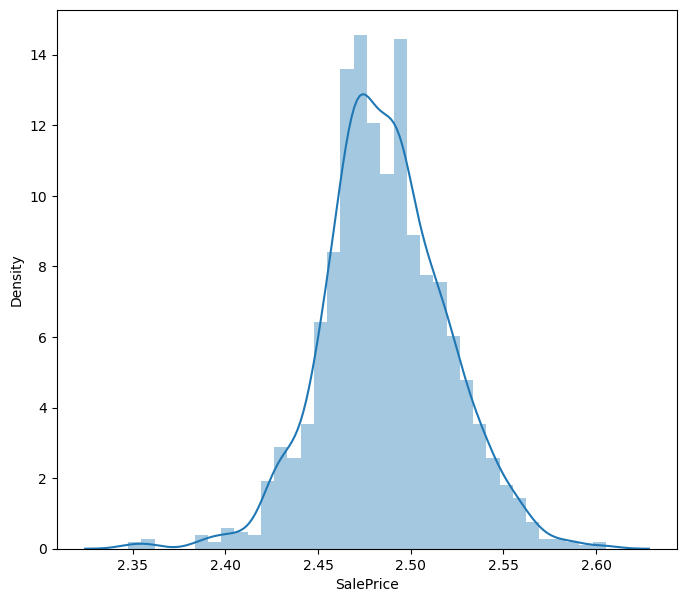

In [15]:
# To check skewness and Kurtosis
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

# Given Kurtosis is > 1, we will do log transformation to check if its reducing
df['SalePrice'] = np.log(df['SalePrice'])

# Check Skewness and Kurtosis post transformation
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

# Skewness and Kurtosis have reduced to acceptable range
plt.figure(figsize=[8,7])
sb.distplot(df['SalePrice'])

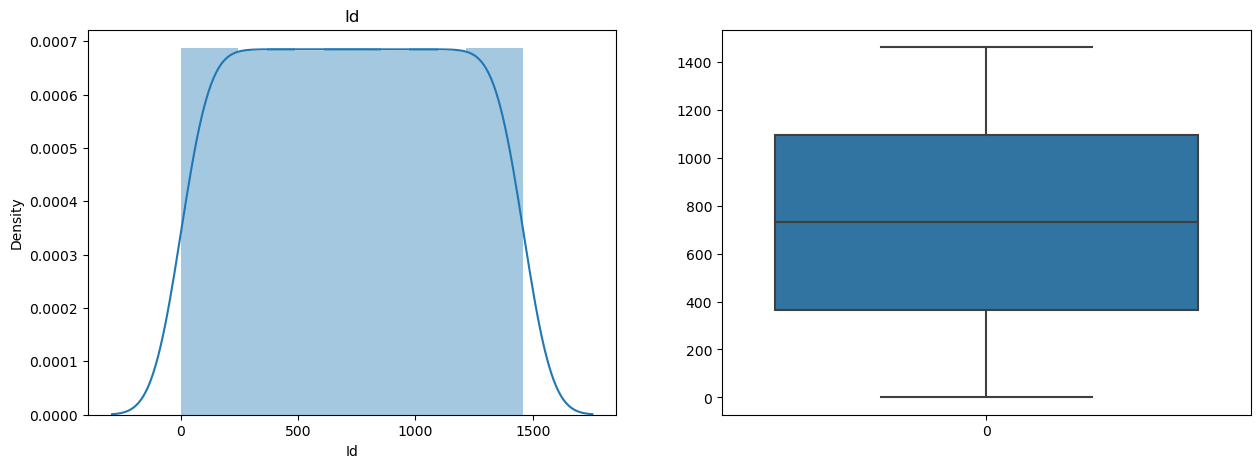

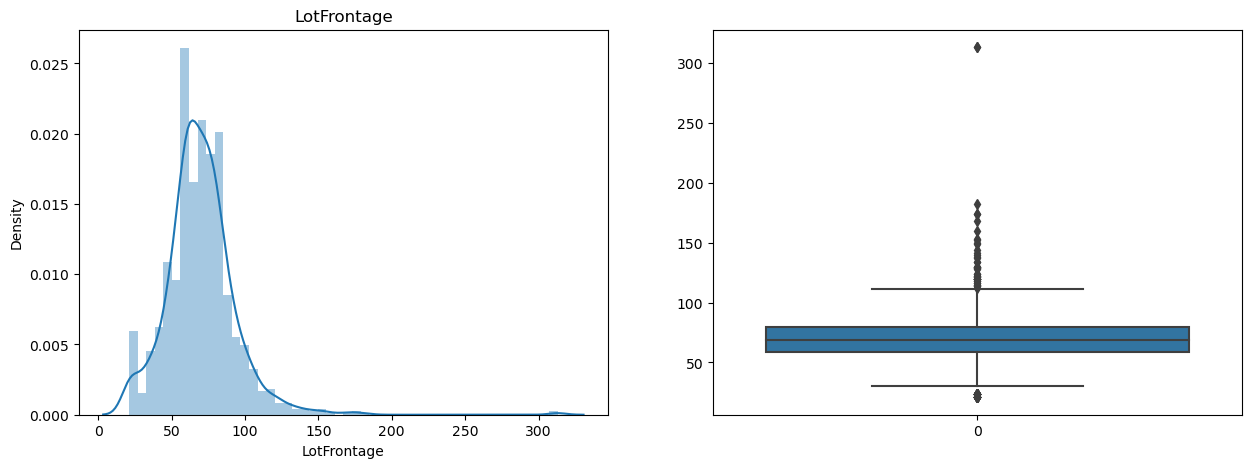

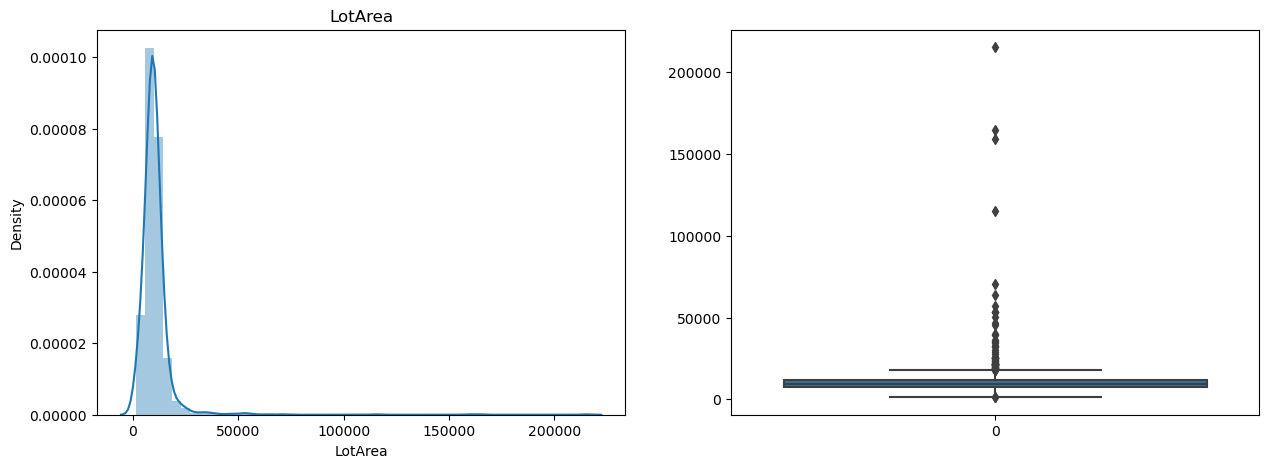

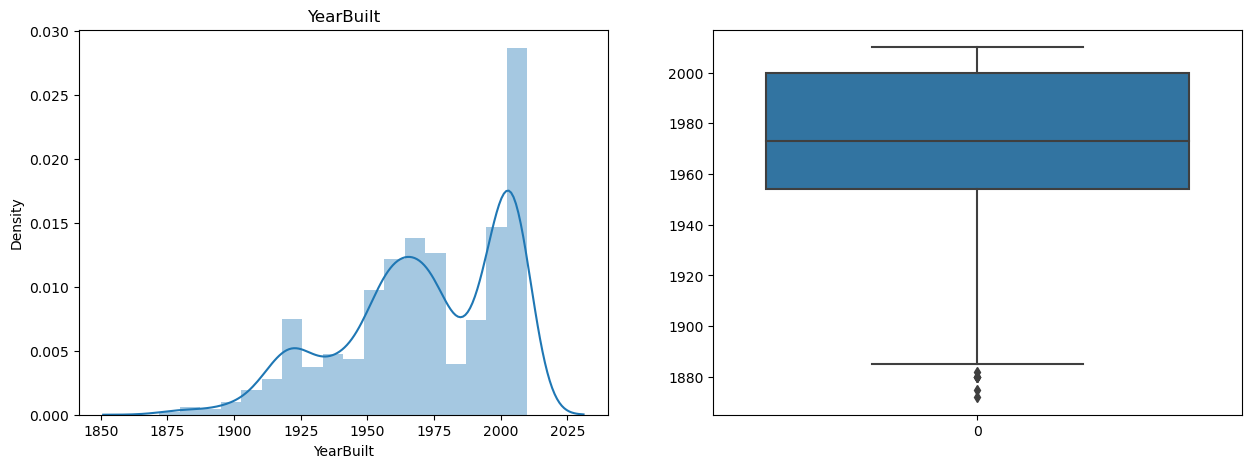

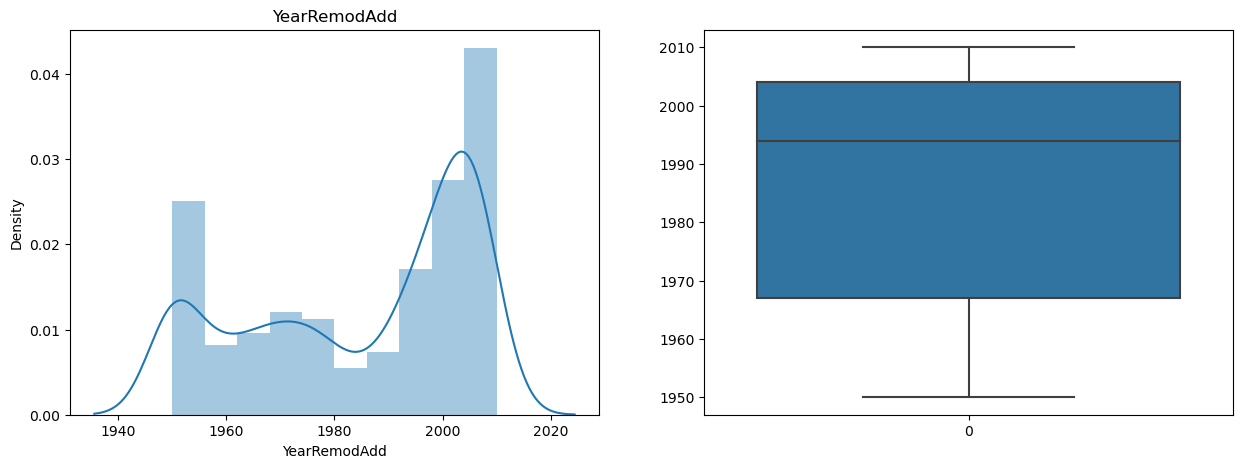

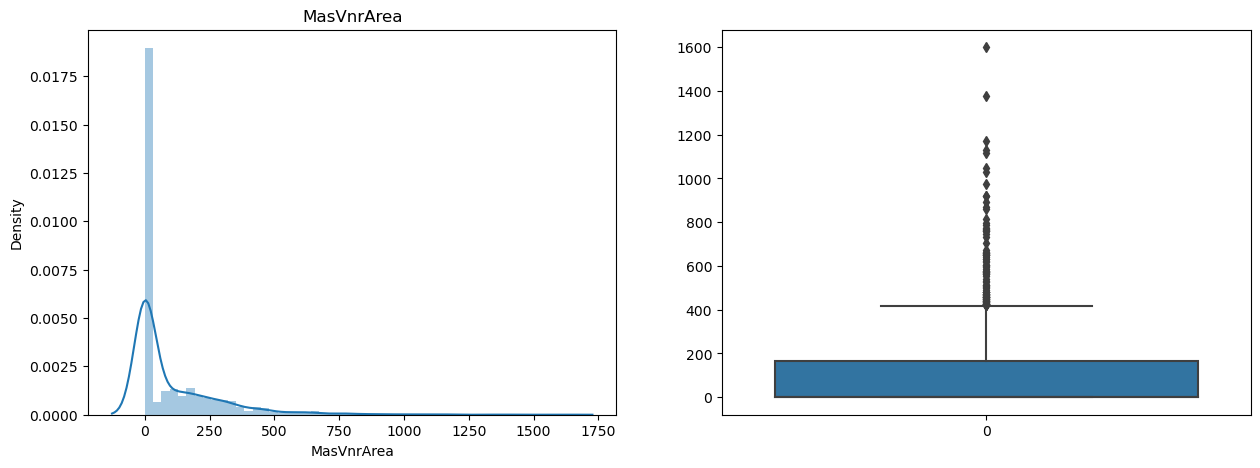

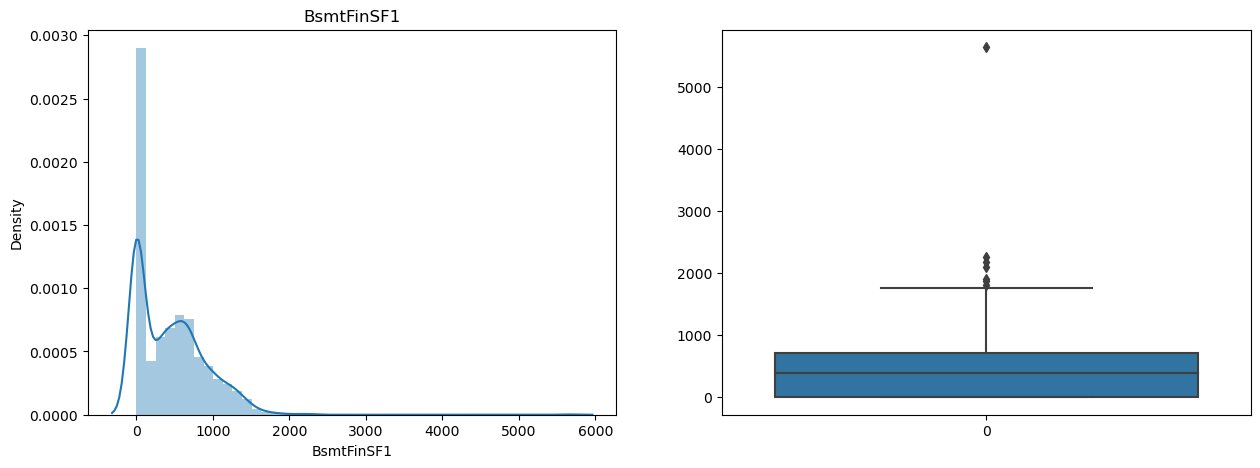

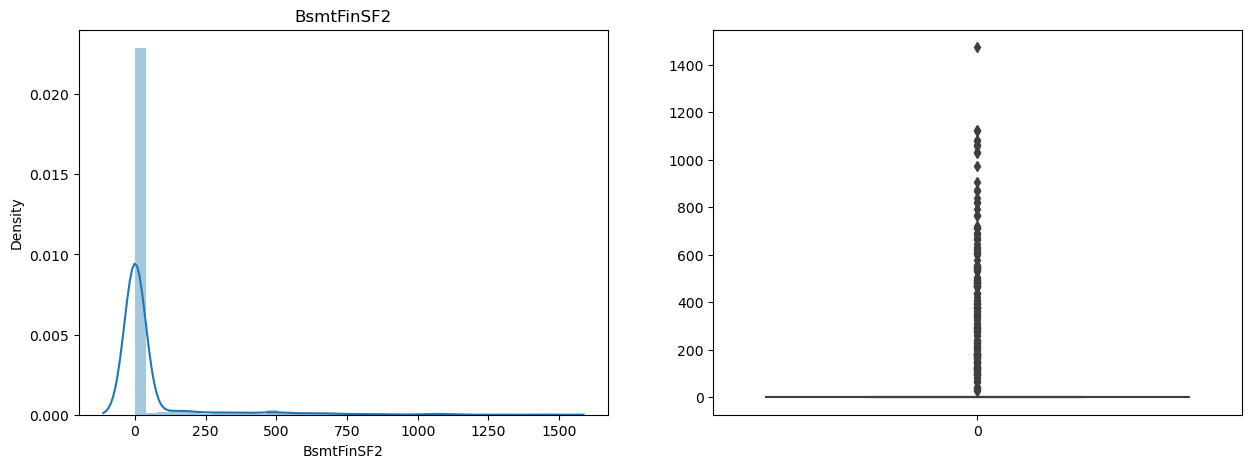

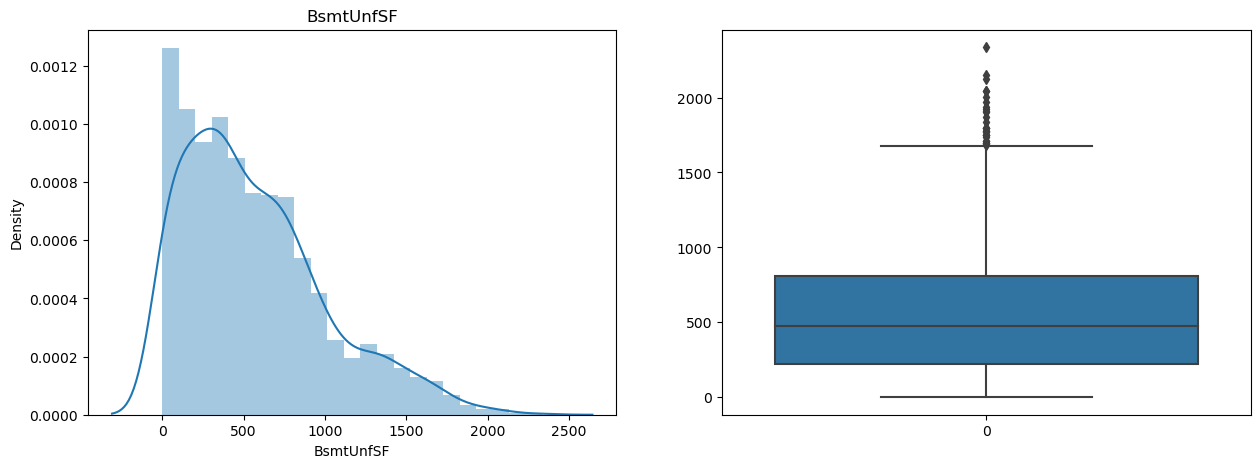

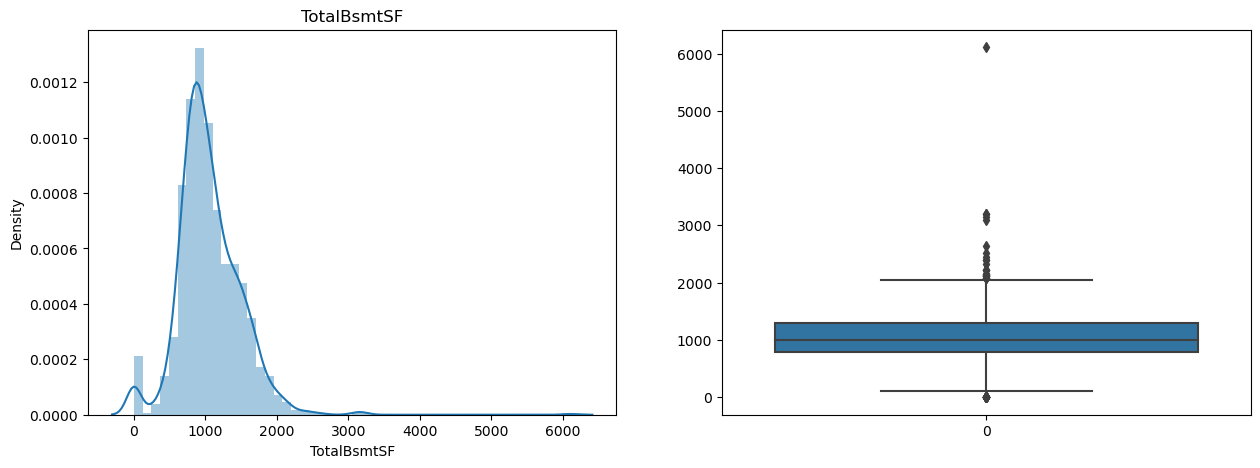

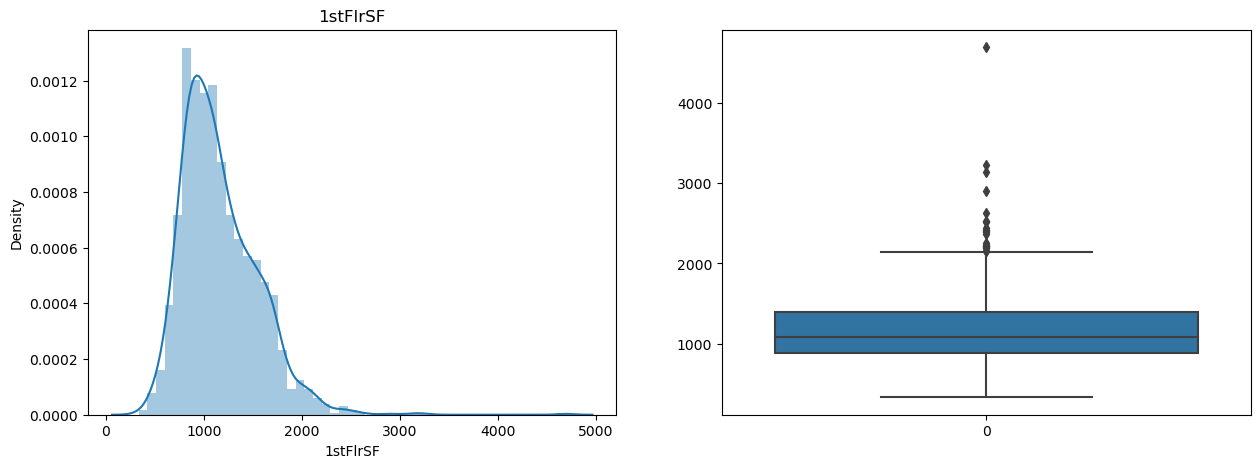

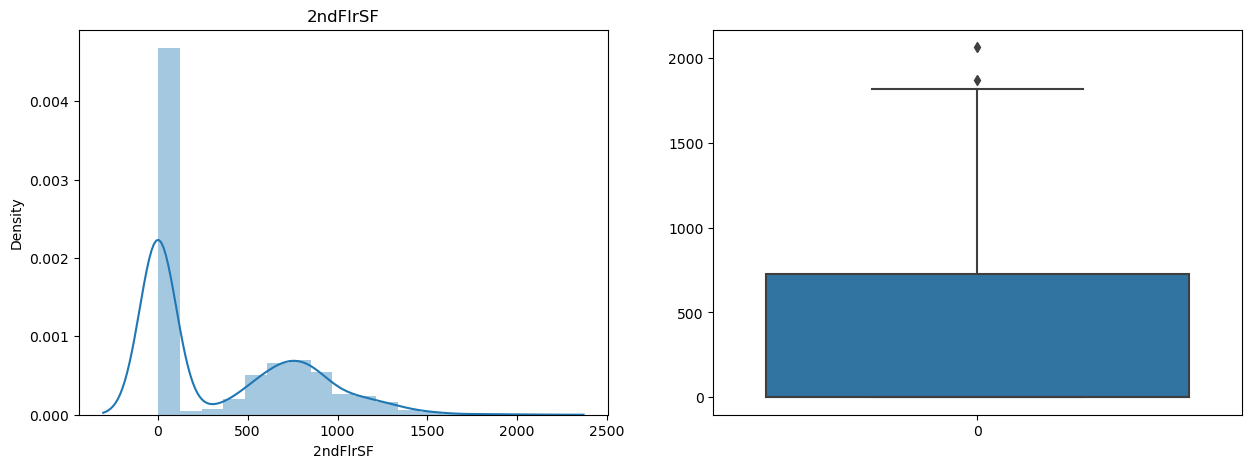

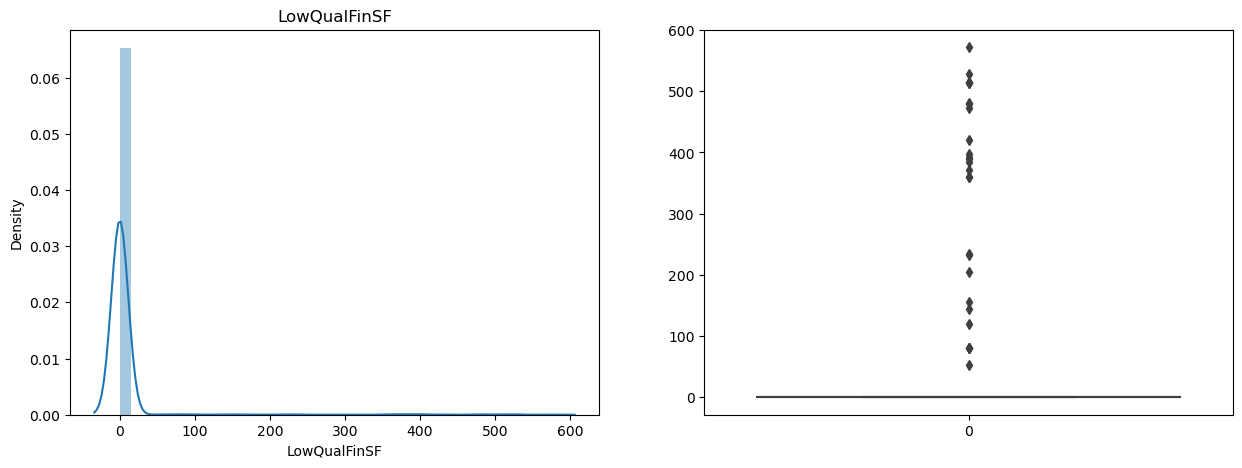

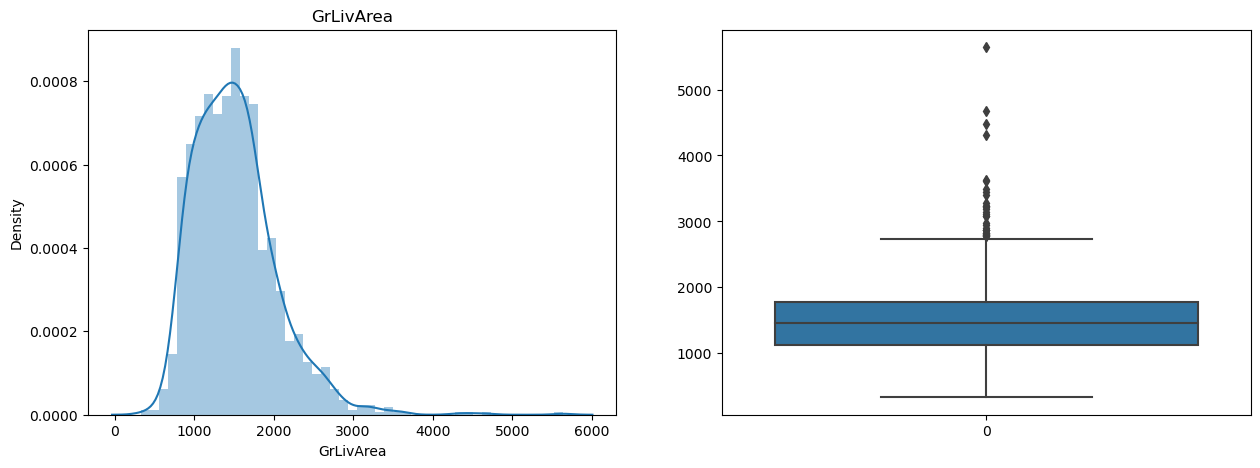

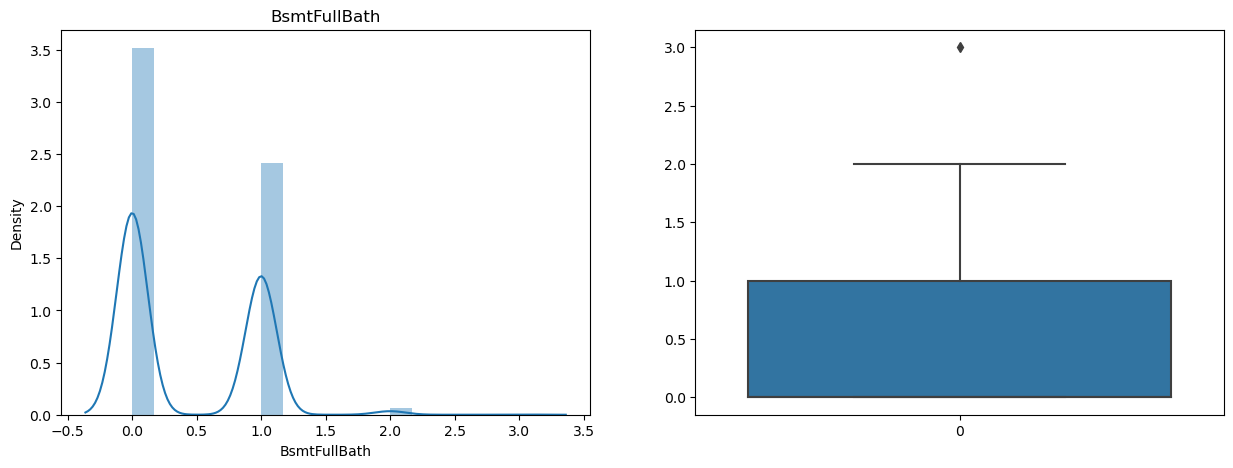

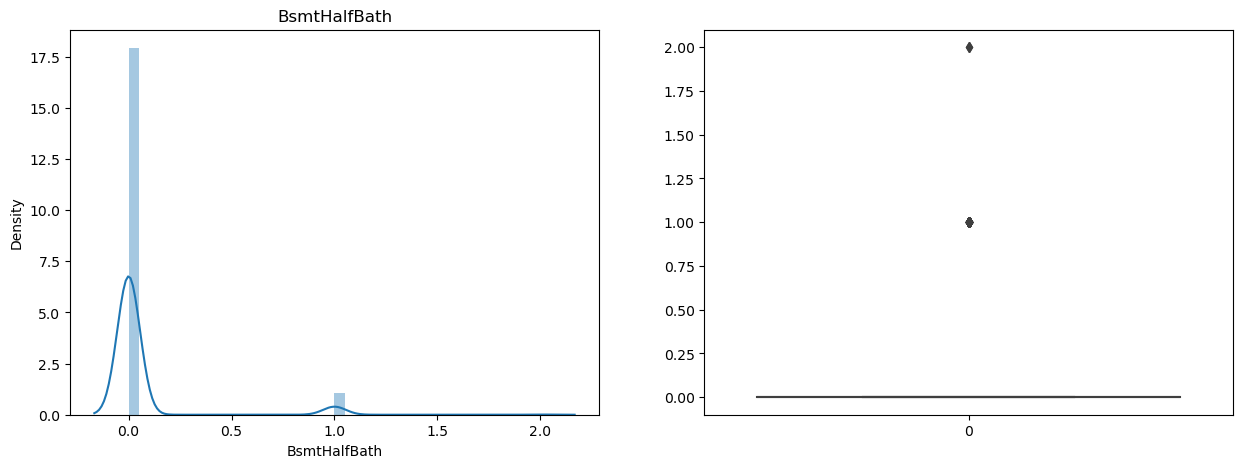

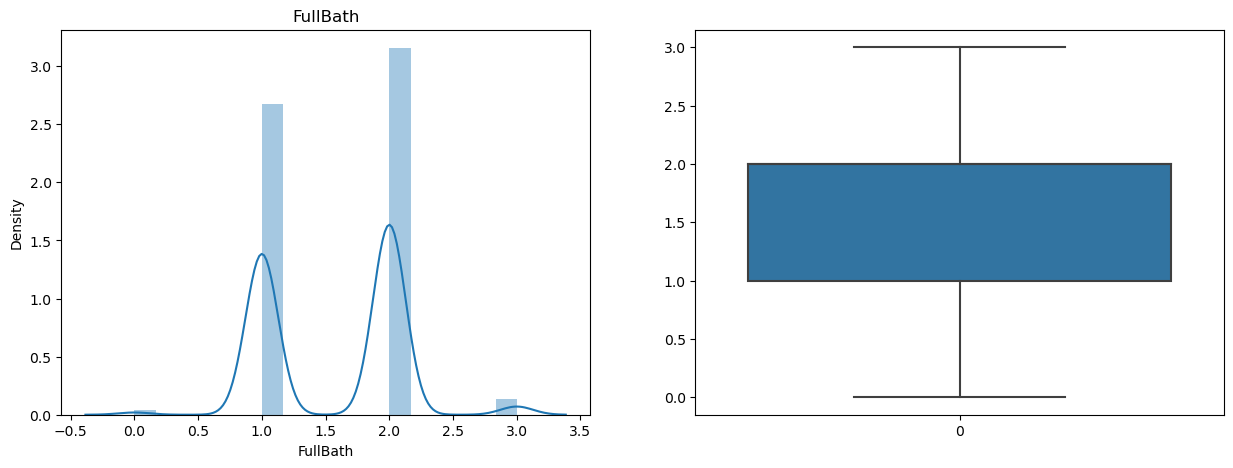

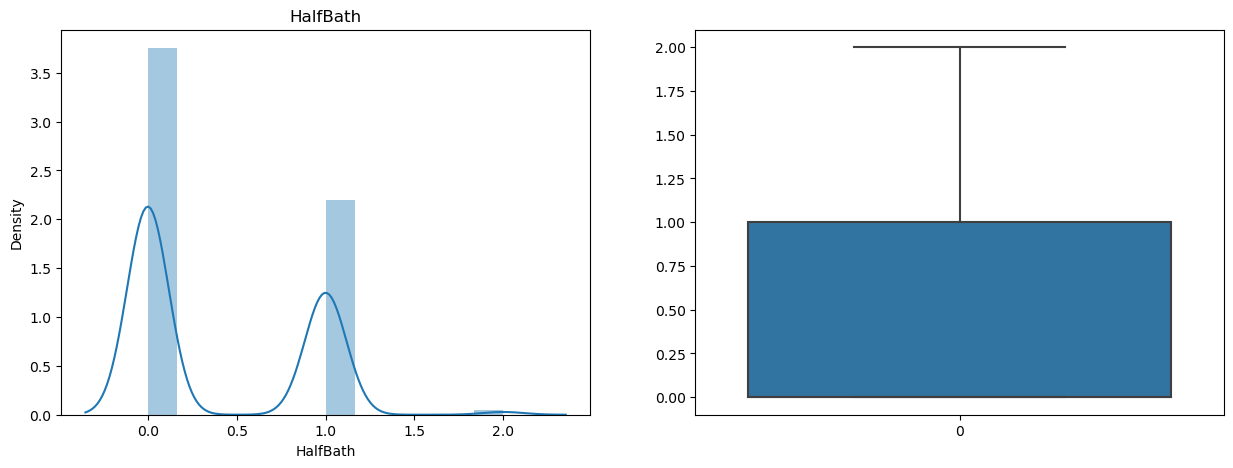

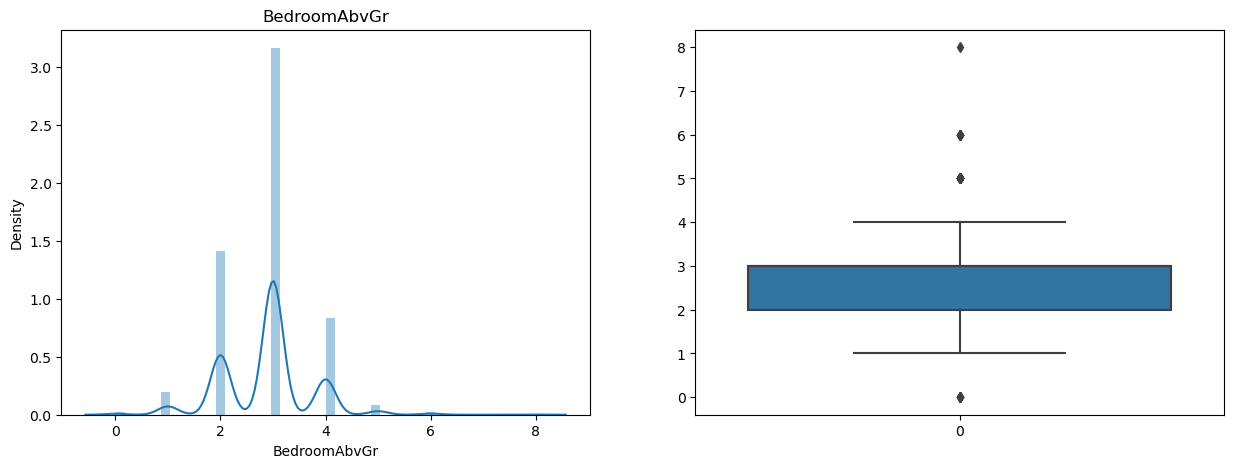

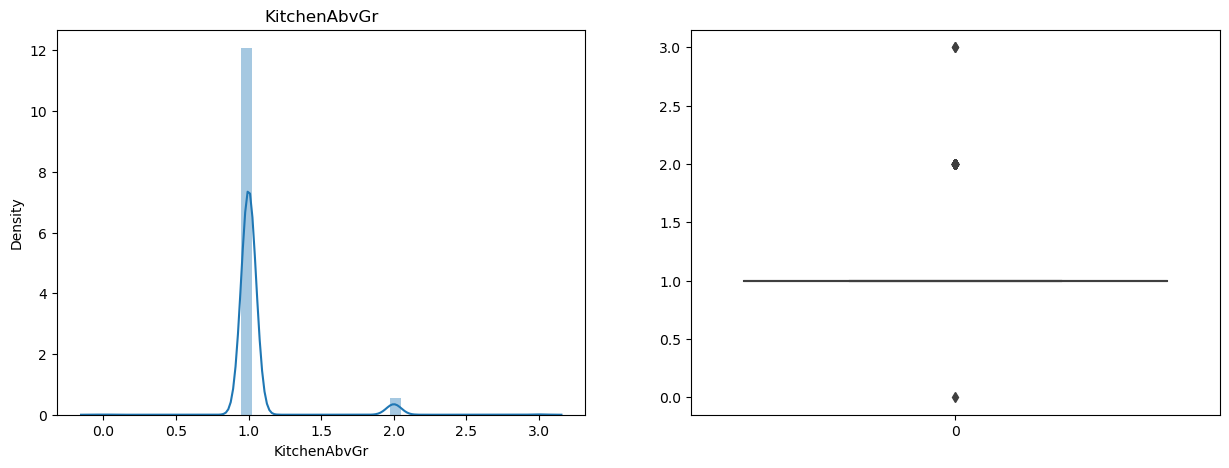

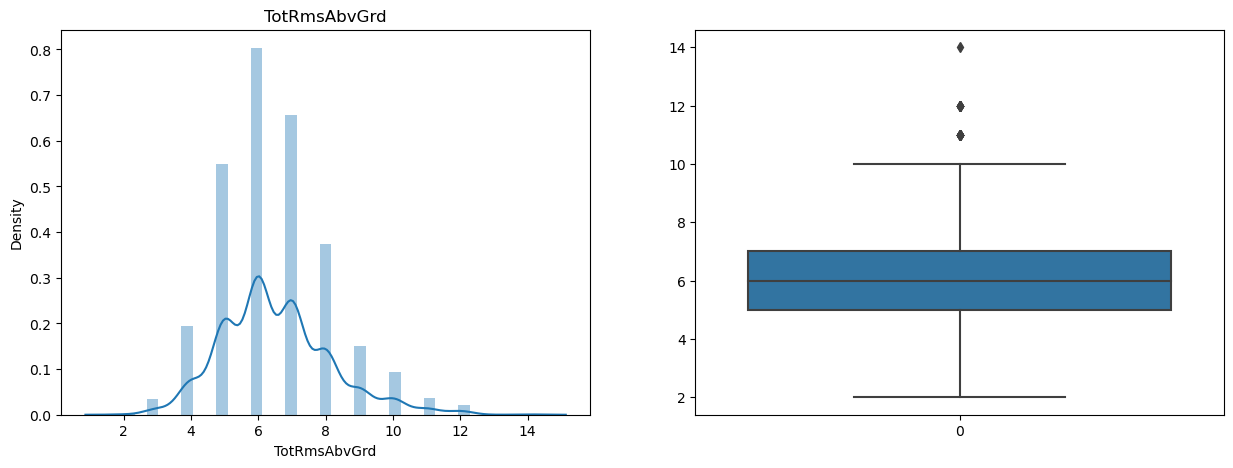

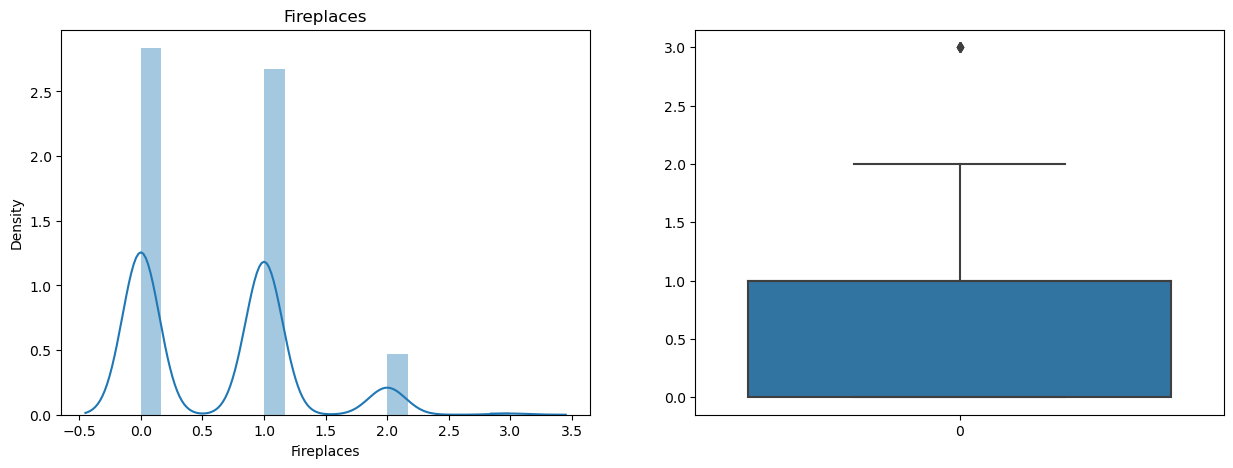

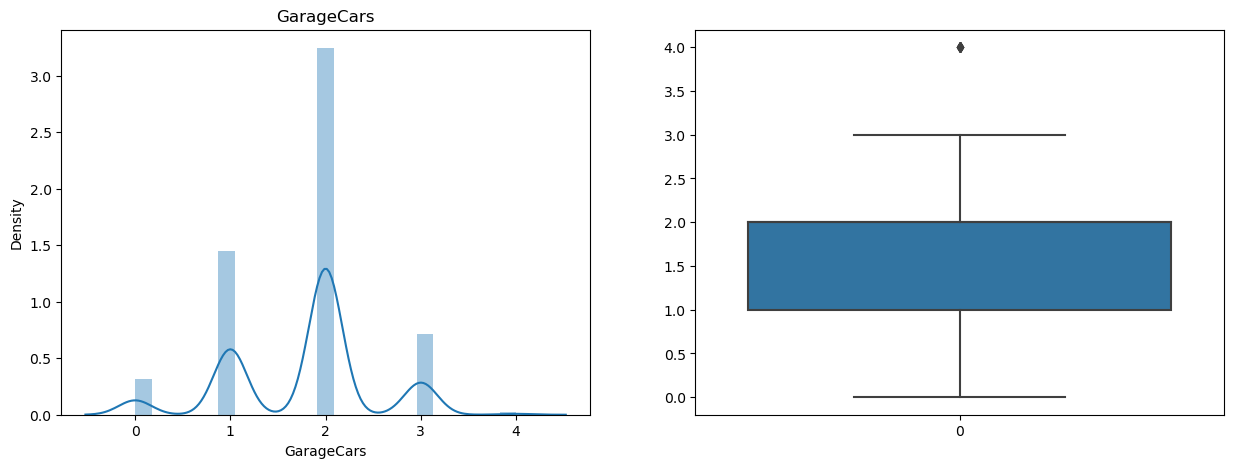

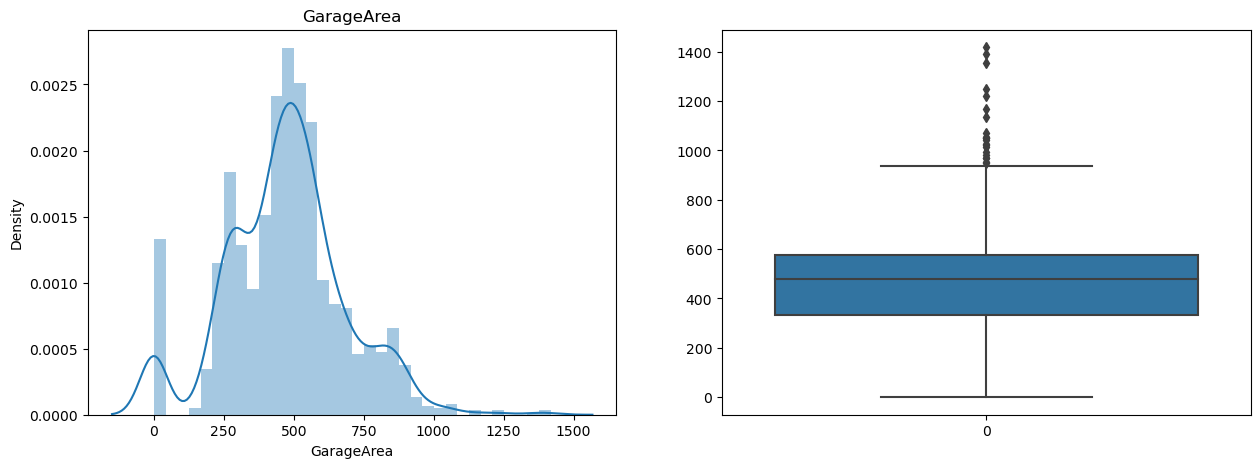

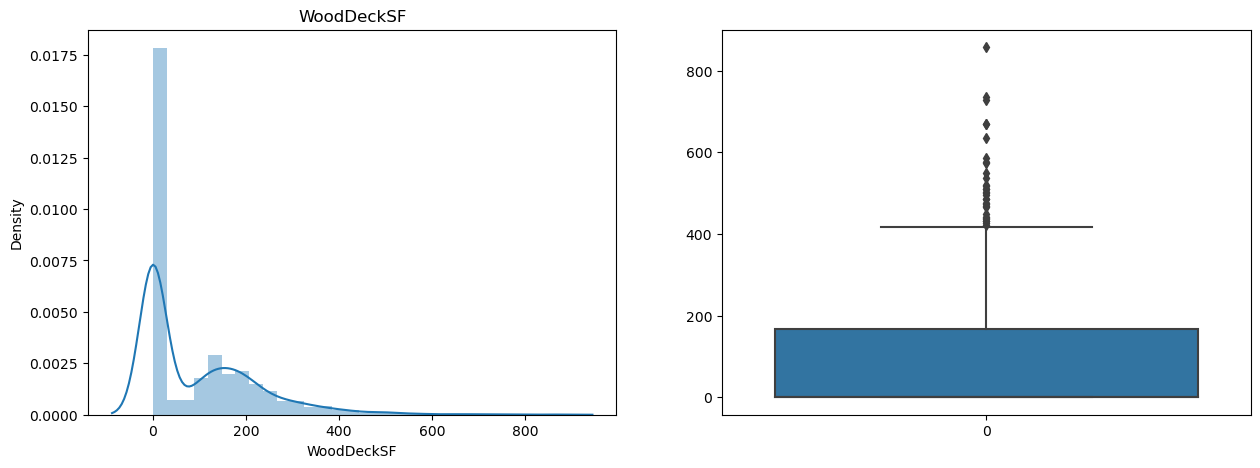

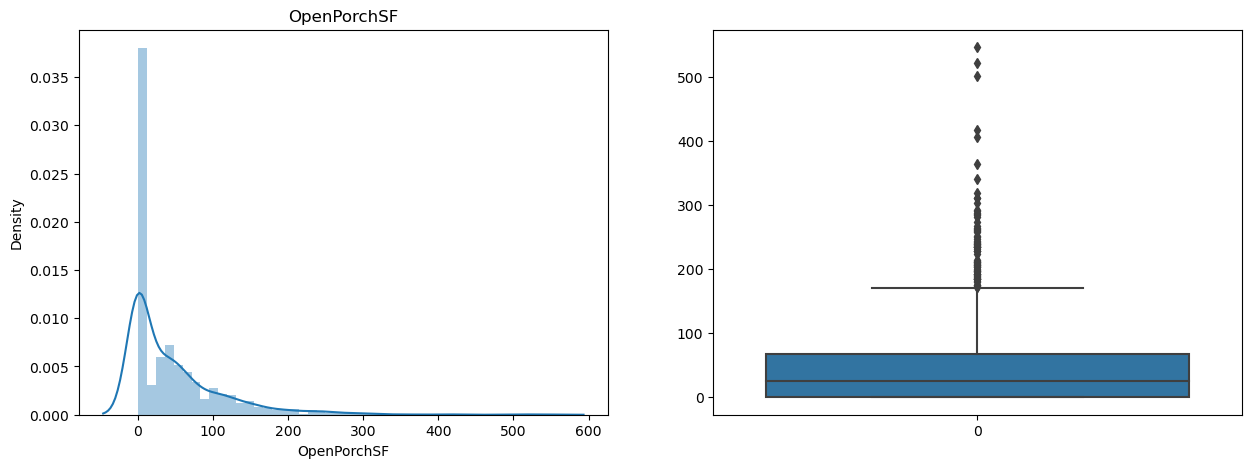

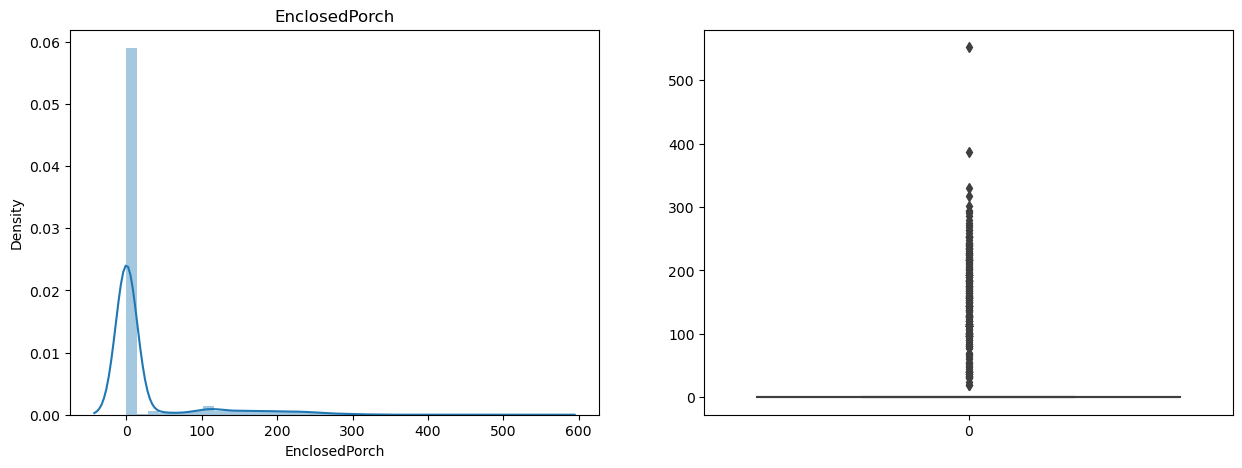

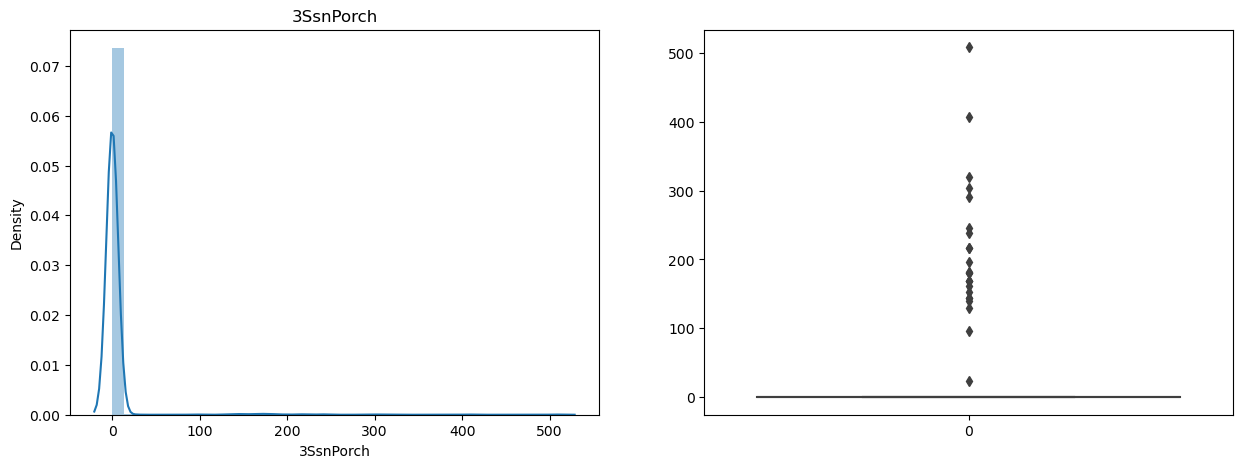

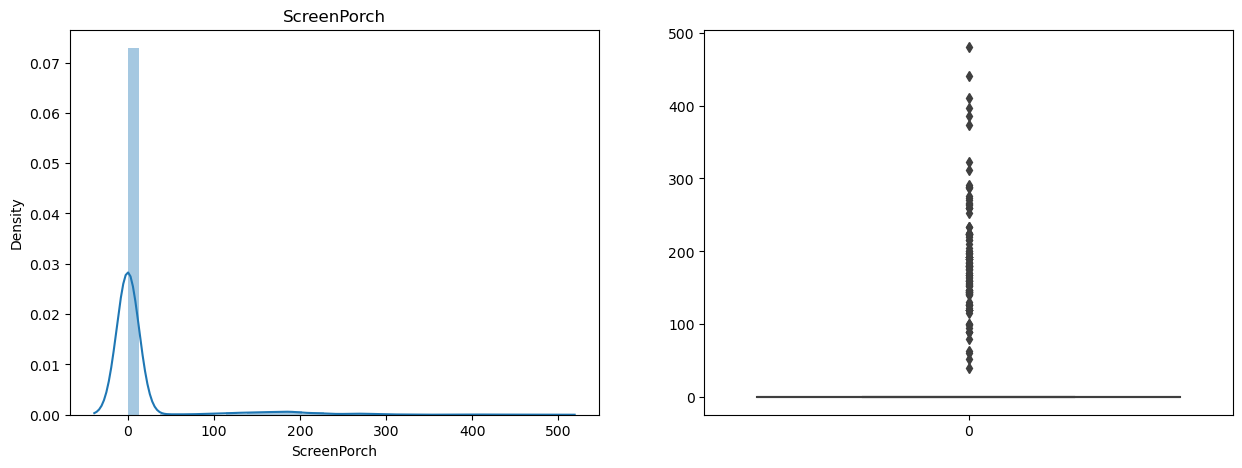

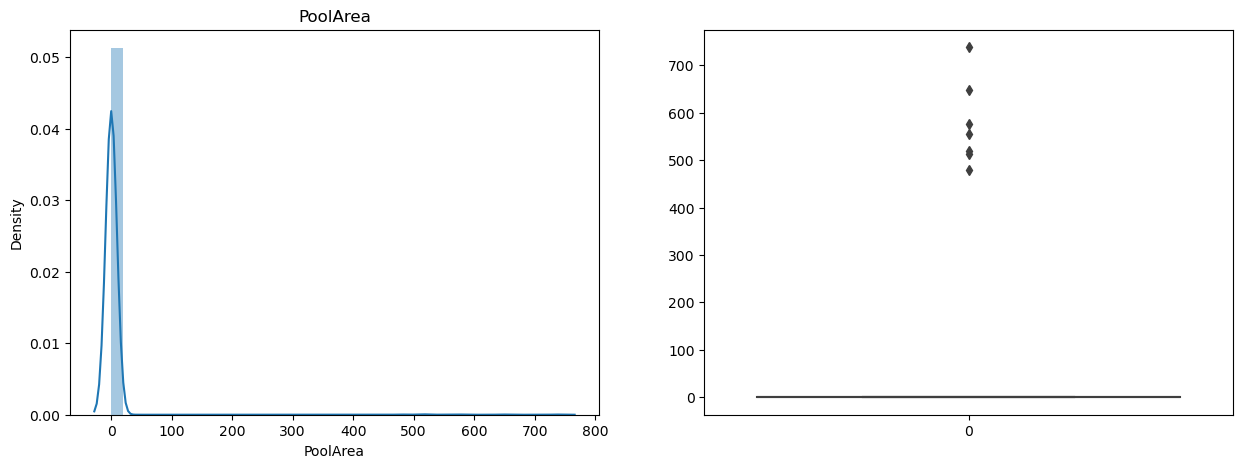

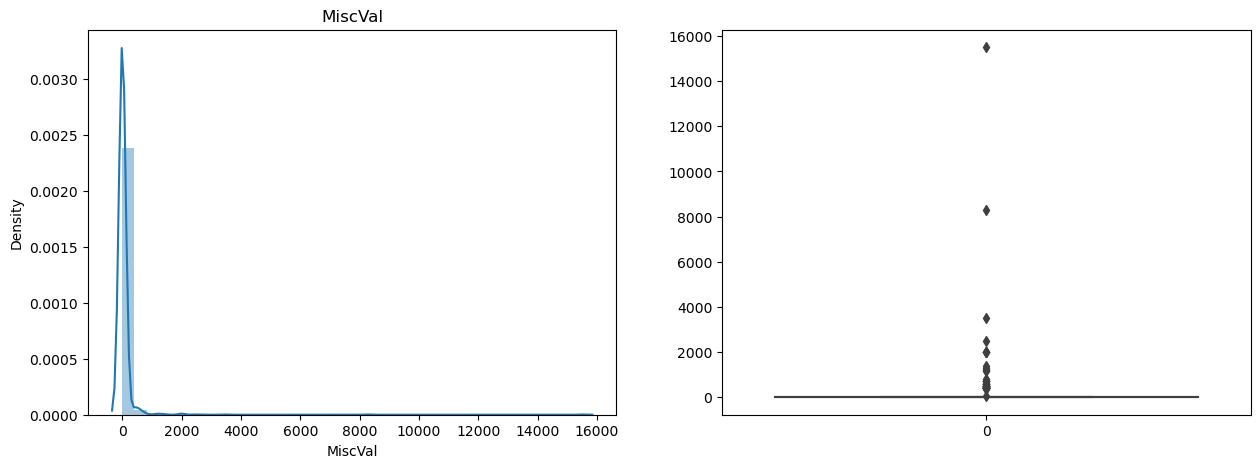

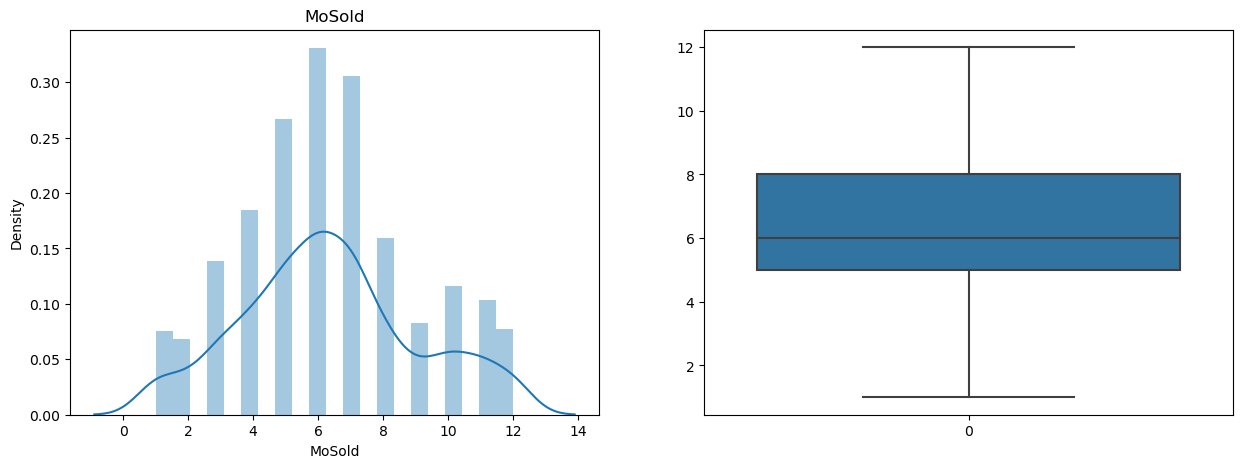

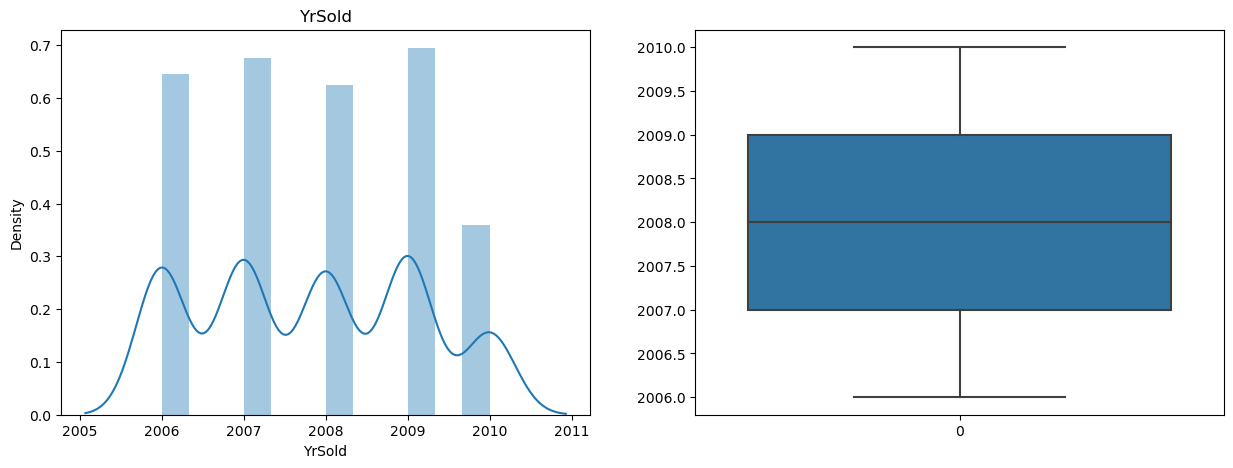

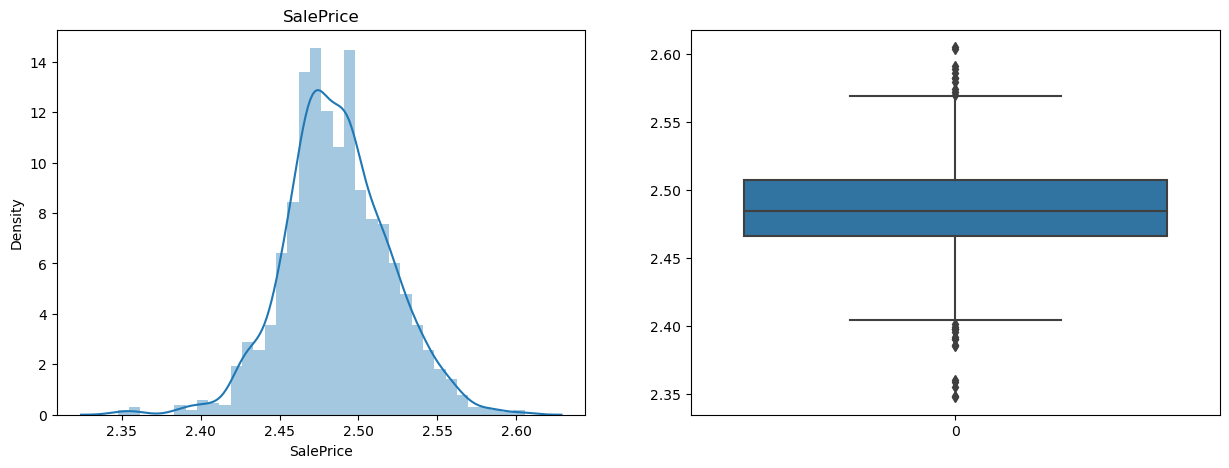

In [16]:
# EDA on Numerical Variables

# Selecting all numerical variable column names
num_col = df.select_dtypes(include=['int64', 'float64']).columns

for col in df[num_col]:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col)
    sb.distplot(df[col])
    
    plt.subplot(1,2,2)
    sb.boxplot(df[col])
    plt.show()  
    
    
# Findings
# 1. There are outliers across multiple variables (BsmtUnfSF, BsmtUnfSF2,BsmtUnfSF1, MasVnrArea, YearBuilt etc ) and hence outlier treatment would be required

MSSubClass


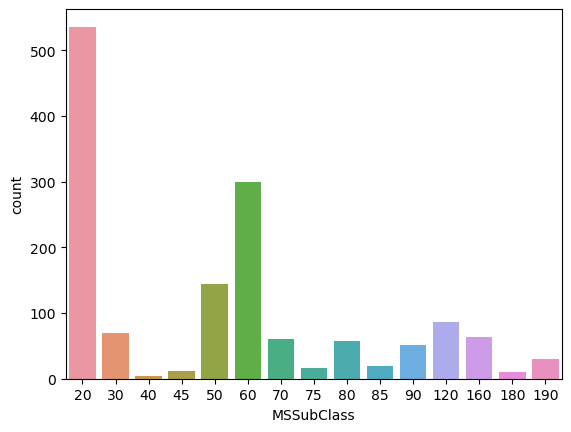

MSZoning


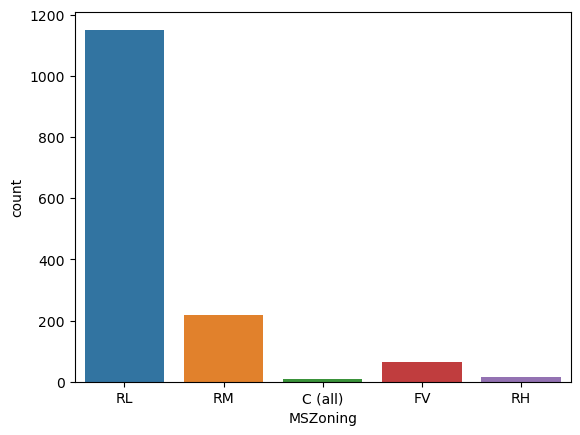

Street


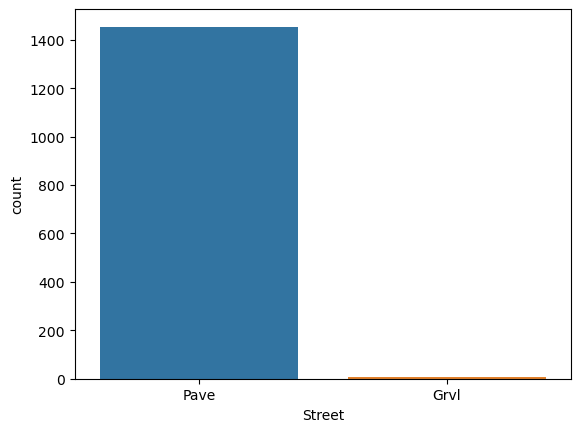

Alley


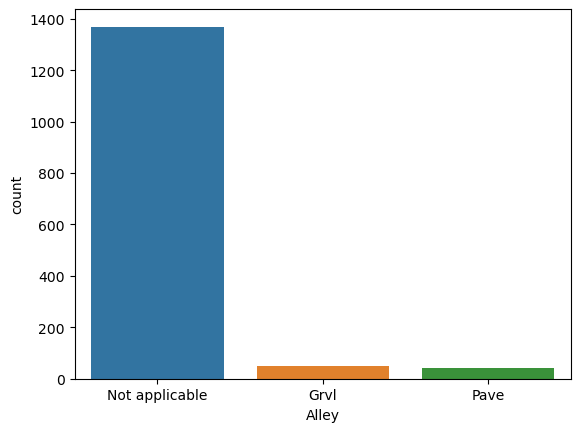

LotShape


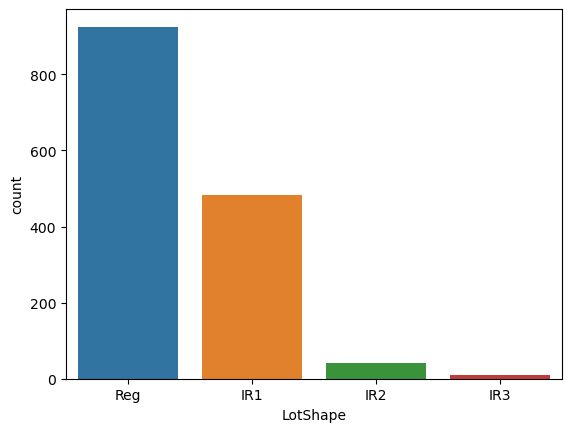

LandContour


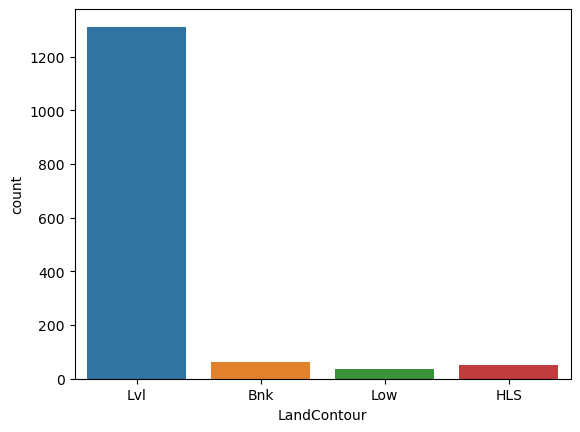

Utilities


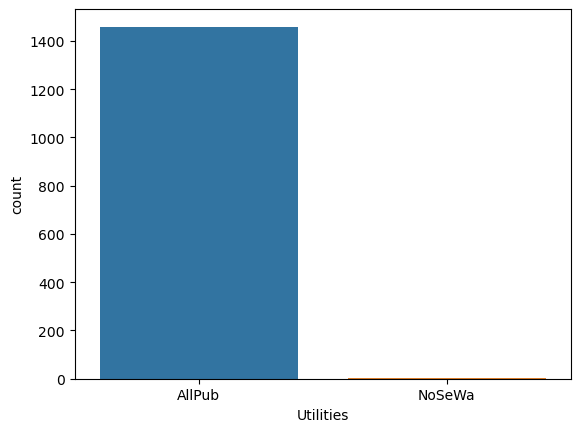

LotConfig


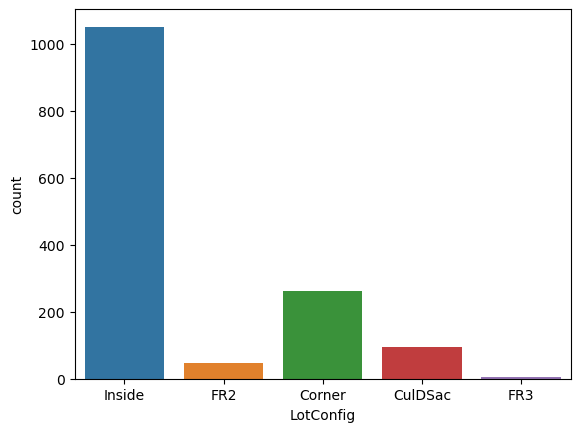

LandSlope


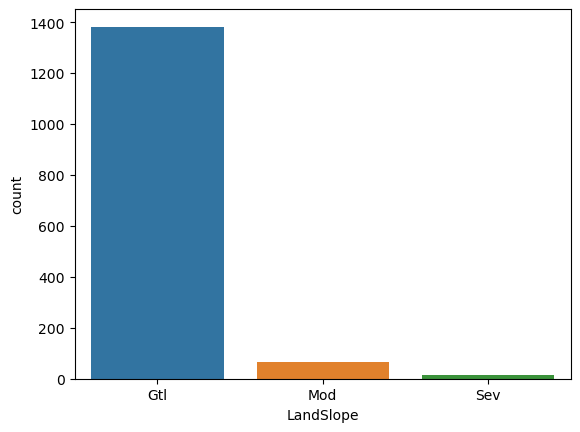

Neighborhood


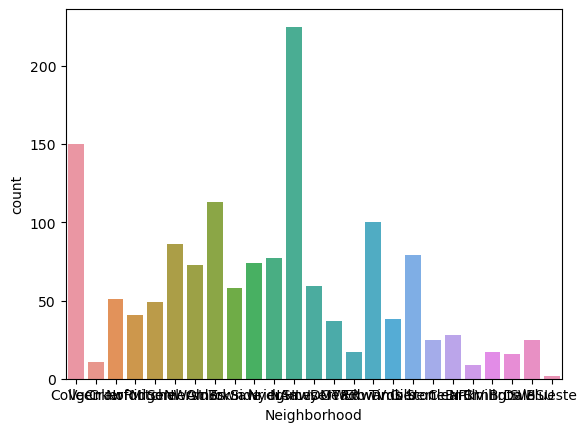

Condition1


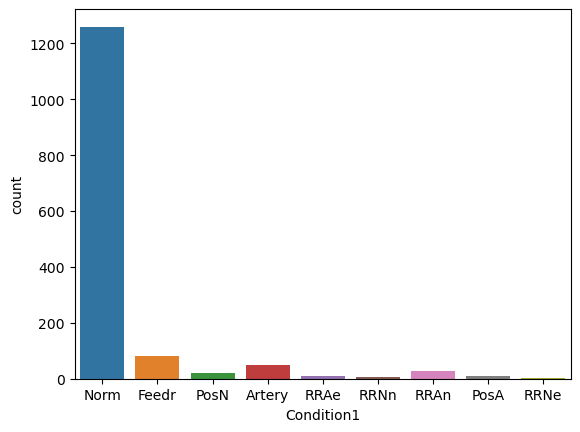

Condition2


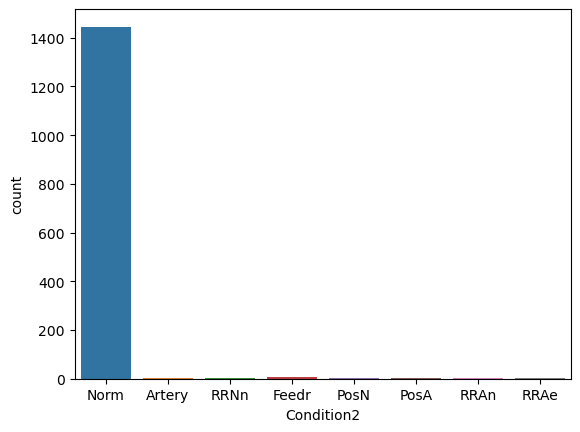

BldgType


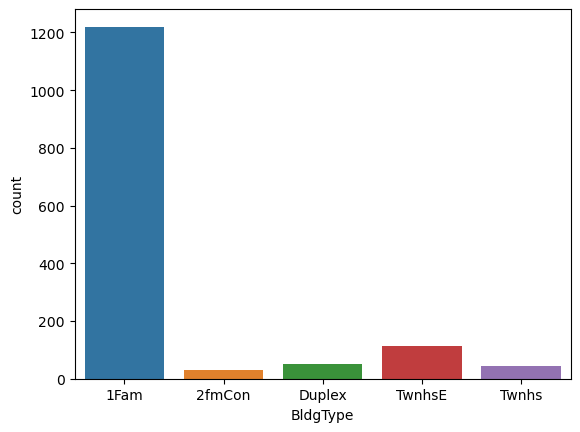

HouseStyle


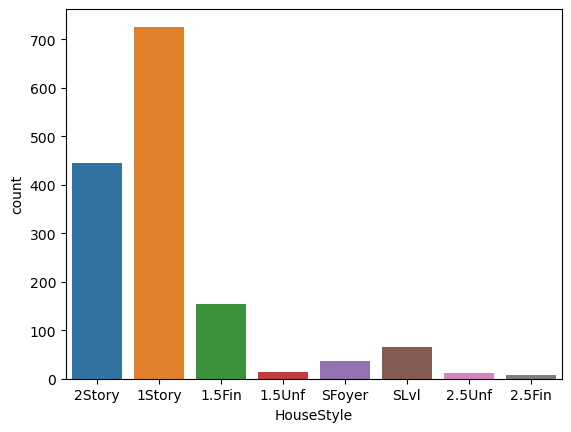

OverallQual


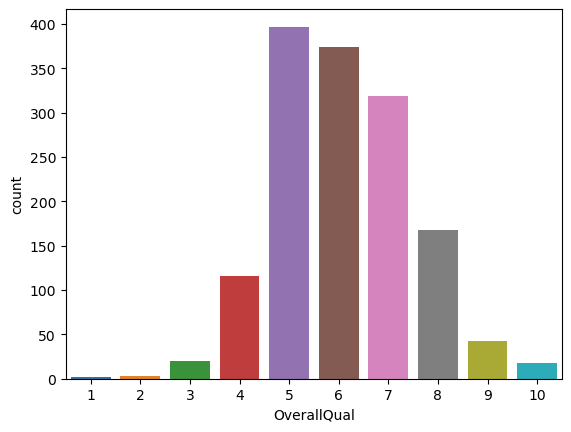

OverallCond


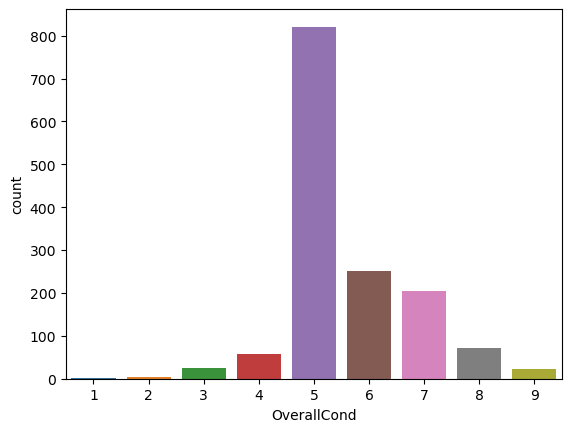

RoofStyle


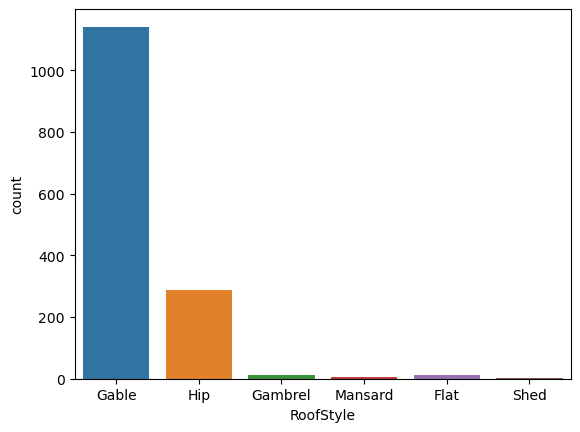

RoofMatl


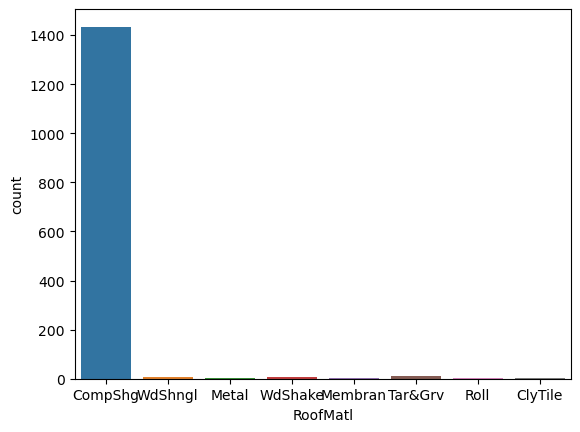

Exterior1st


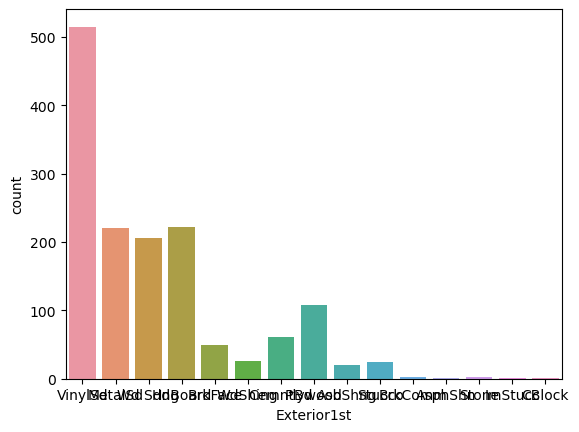

Exterior2nd


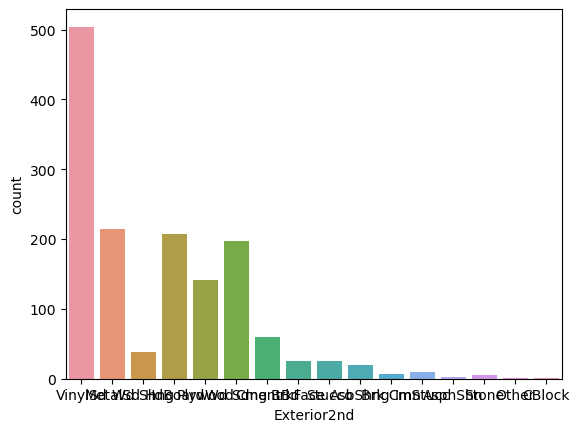

MasVnrType


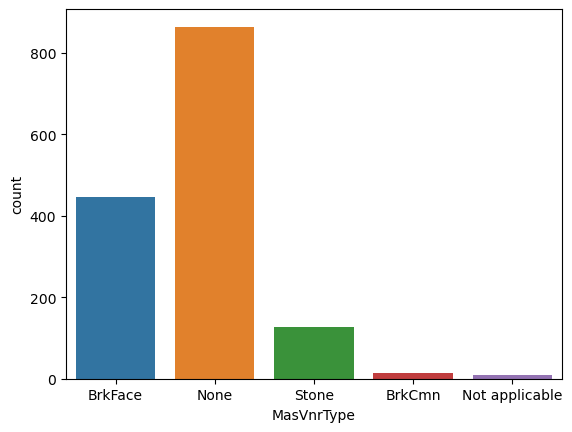

ExterQual


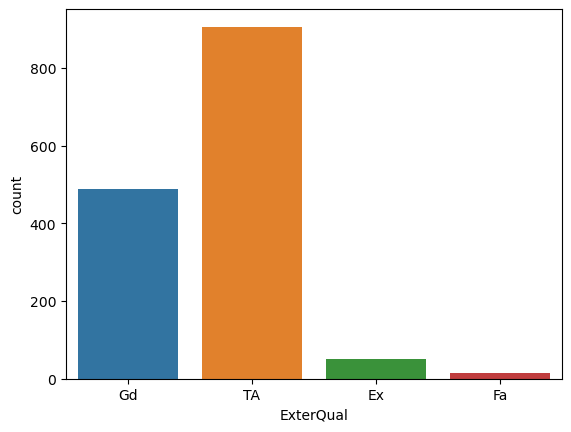

ExterCond


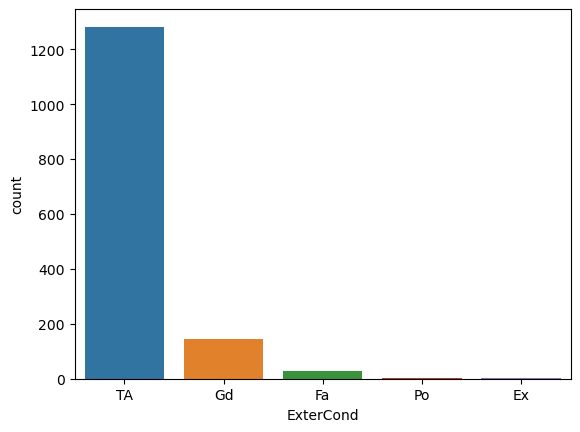

Foundation


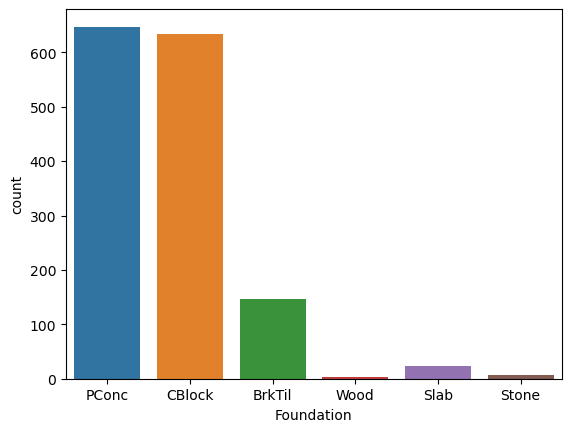

BsmtQual


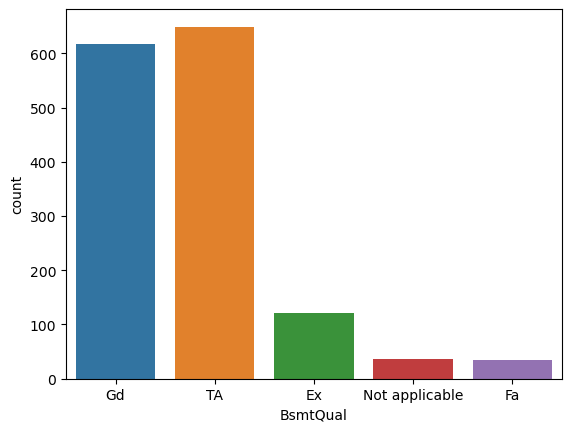

BsmtCond


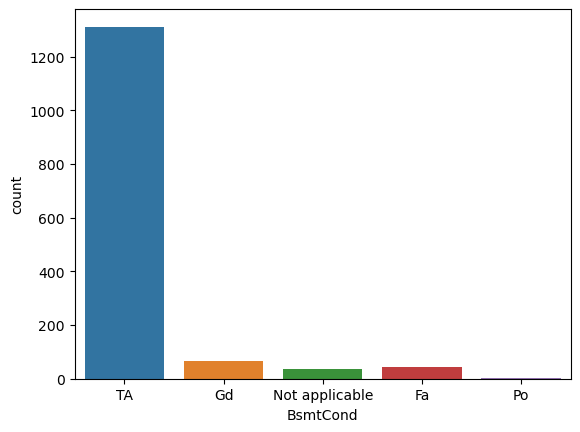

BsmtExposure


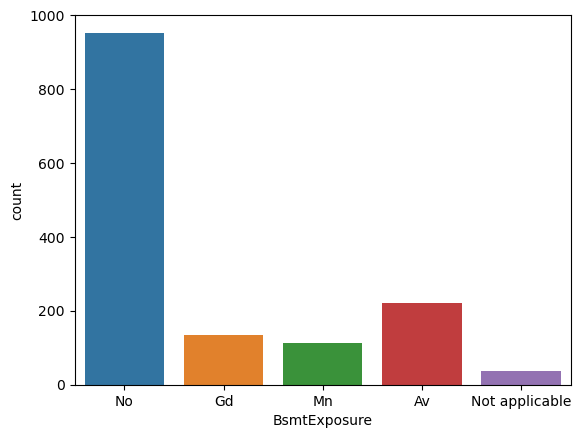

BsmtFinType1


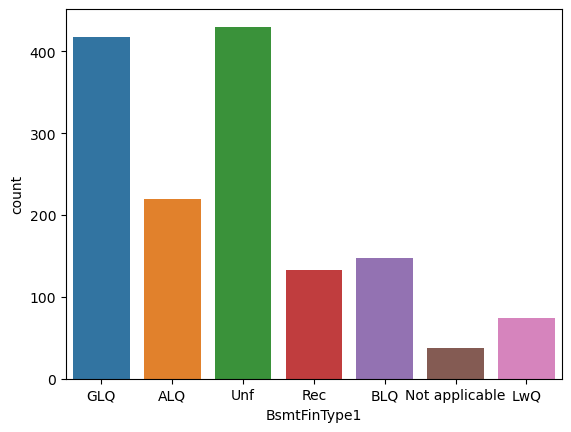

BsmtFinType2


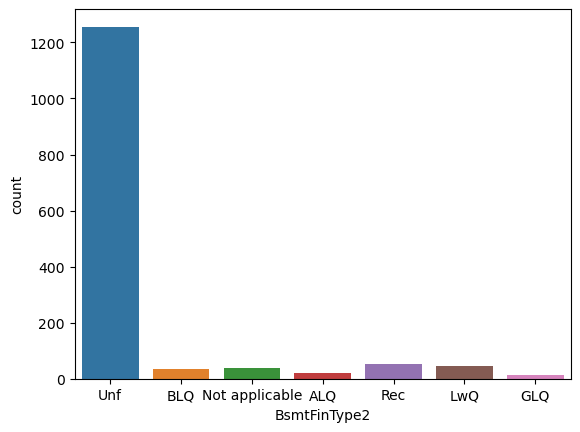

Heating


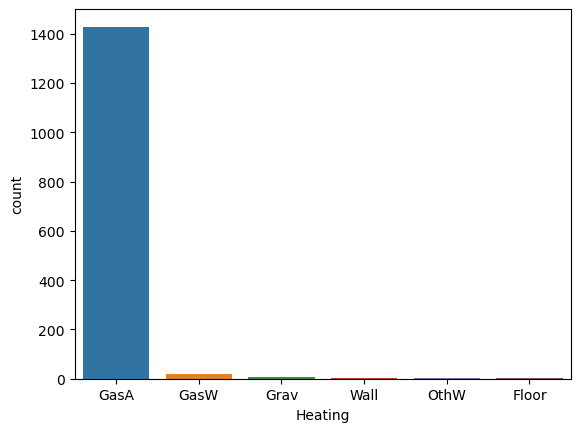

HeatingQC


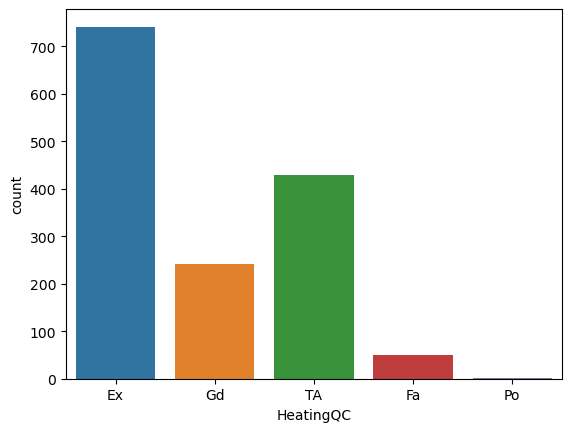

CentralAir


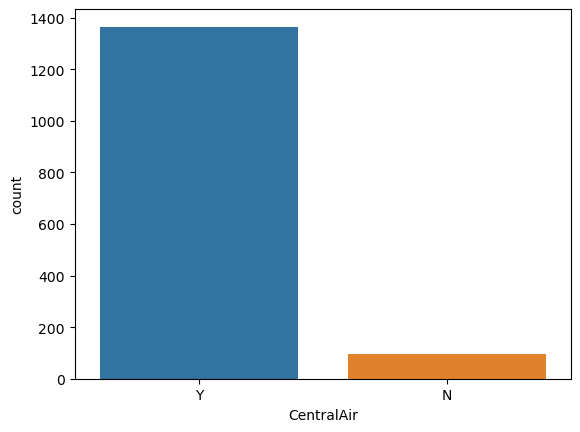

Electrical


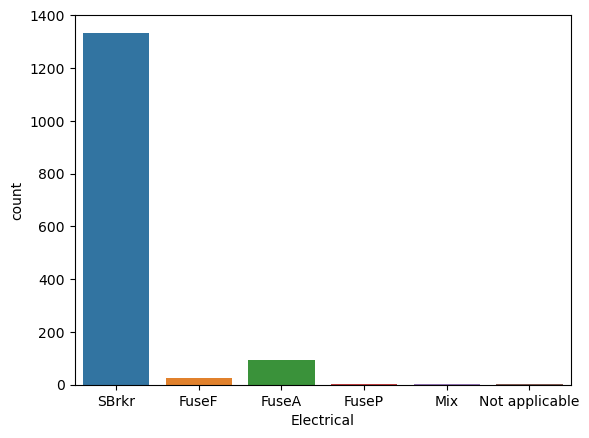

KitchenQual


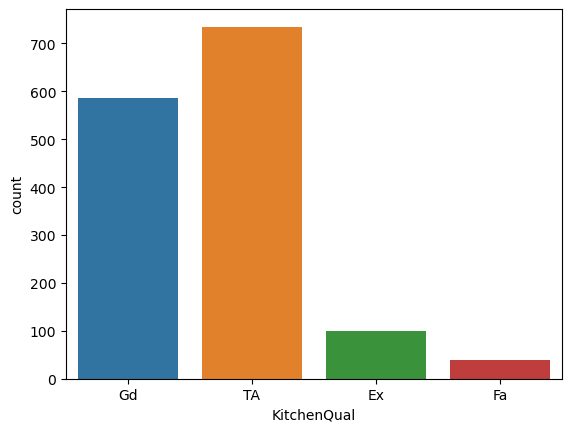

Functional


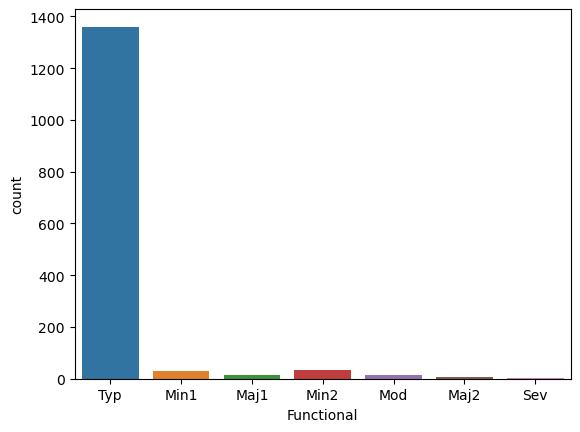

FireplaceQu


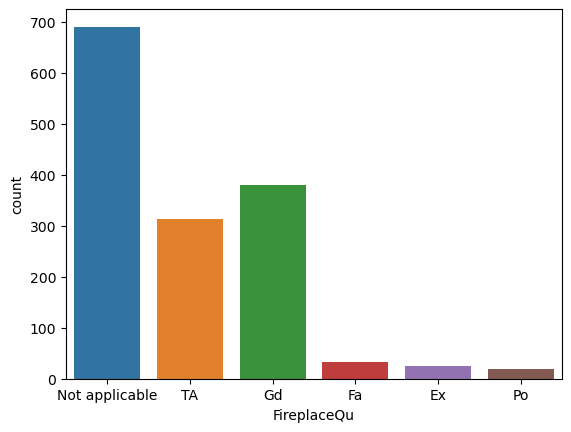

GarageType


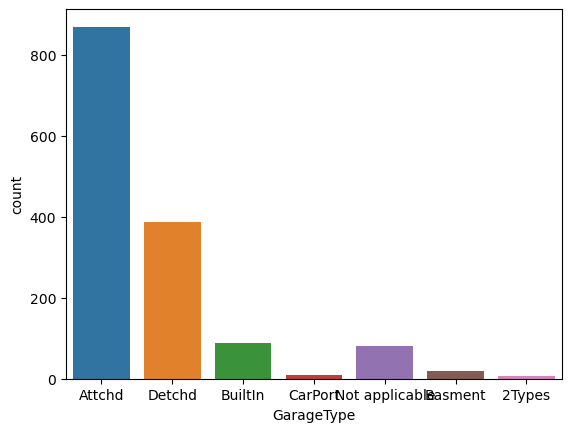

GarageYrBlt


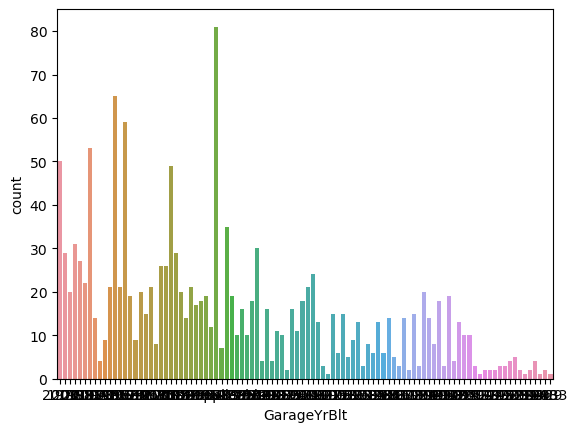

GarageFinish


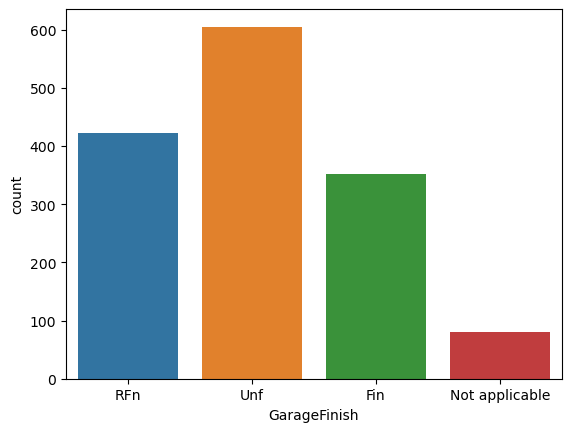

GarageQual


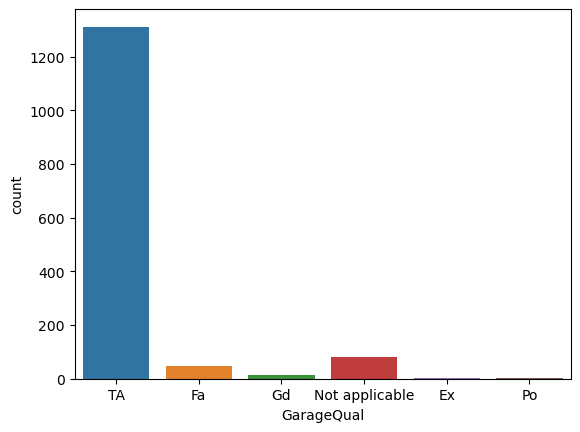

GarageCond


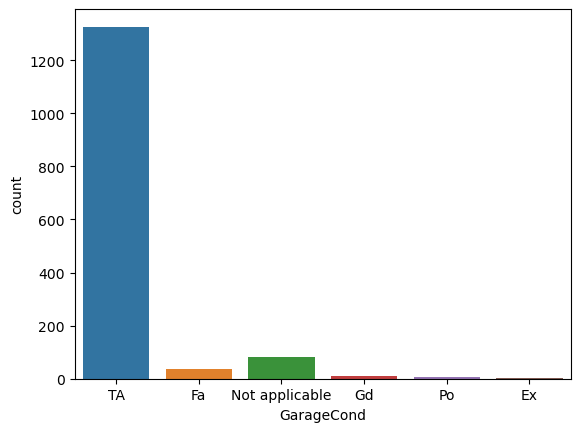

PavedDrive


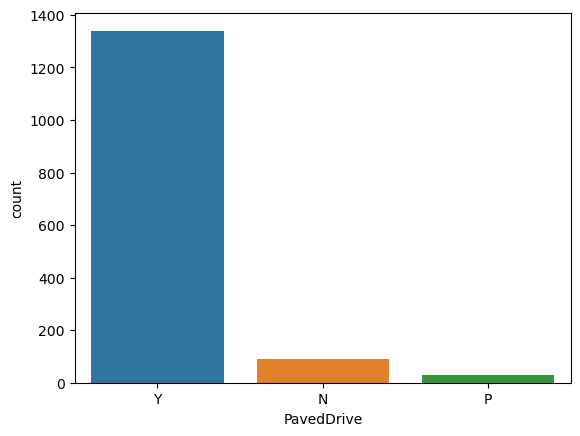

PoolQC


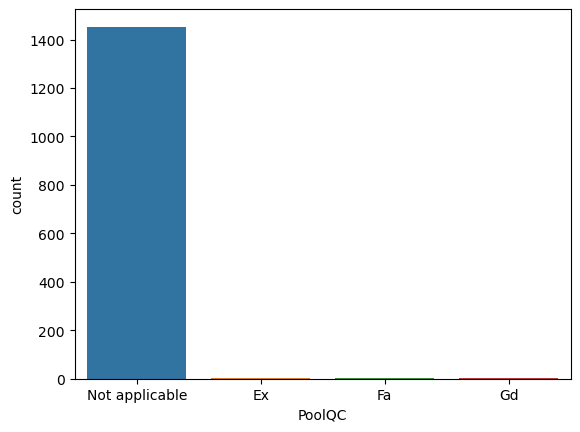

Fence


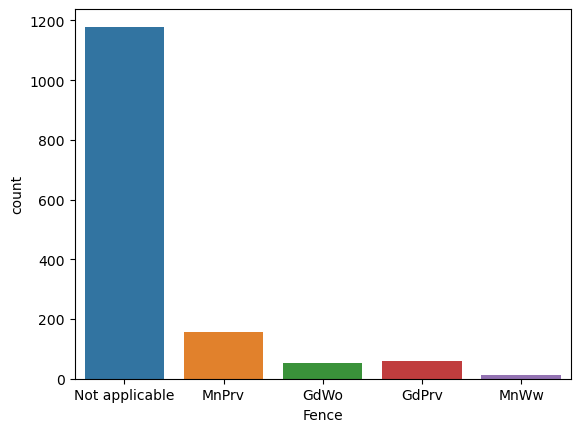

MiscFeature


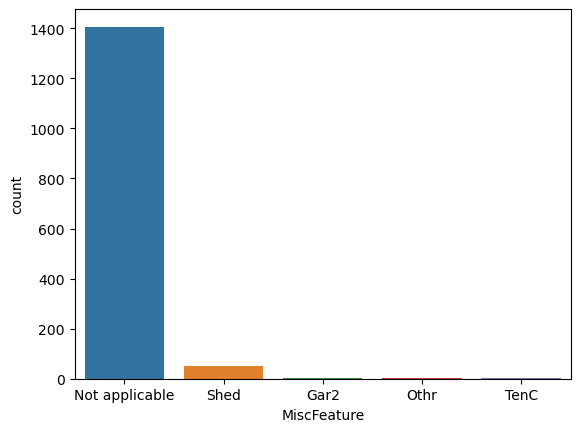

SaleType


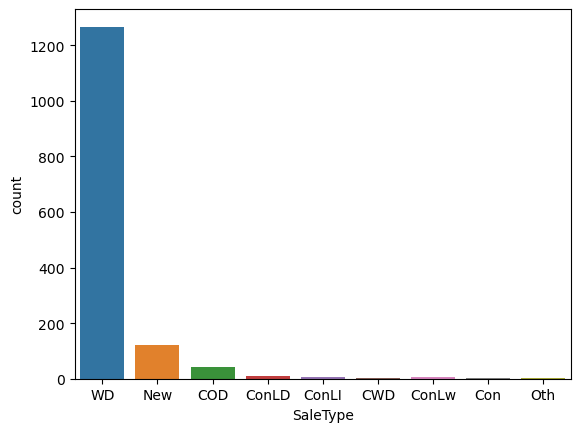

SaleCondition


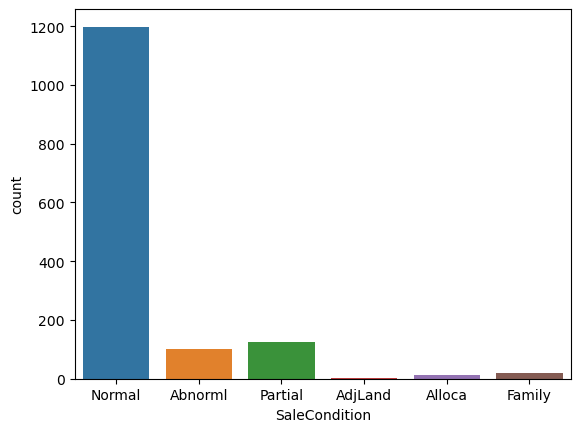

In [17]:
# EDA on Numerical Variables

# Selecting all numerical variable column names
cat_col = df.select_dtypes(include=['object']).columns

#sb.countplot(x = df['MSZoning'])

#print(cat_col)
for c in cat_col:
    print(c)
    sb.countplot(x = df[c])
    plt.show()

### Bivariate Analysis - Correl Matrix

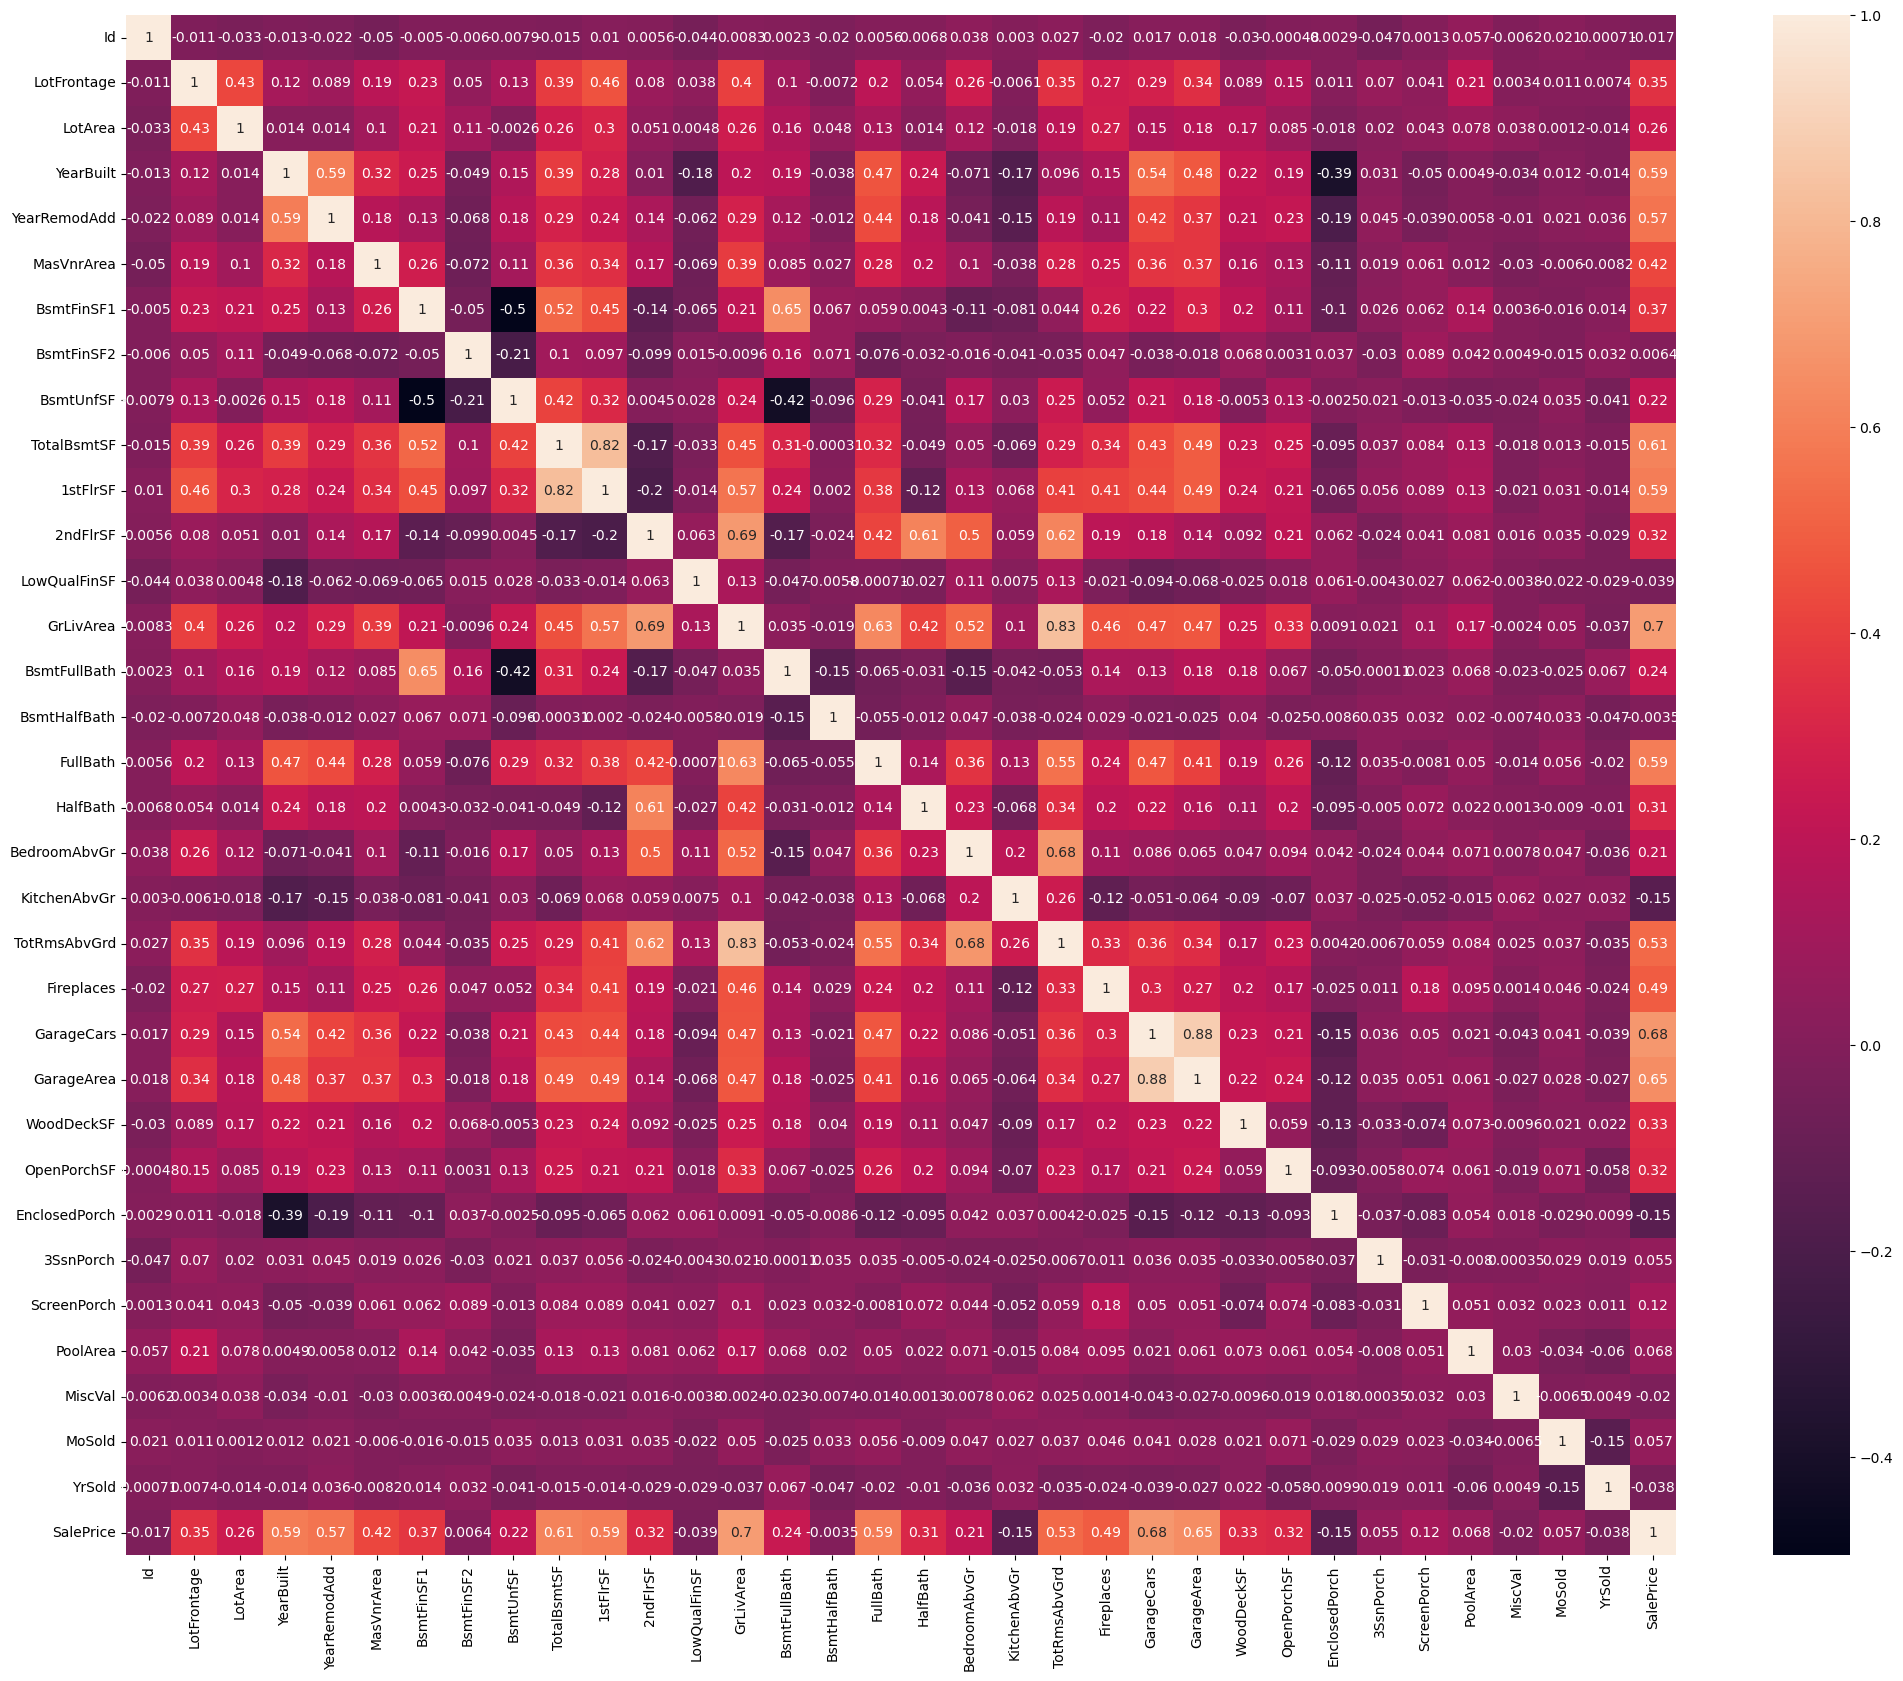

In [18]:
# Correl Matrix heatmap to understand relationship between numerical variables
plt.figure(figsize=(25,20))
sb.heatmap(df[num_col].corr(), annot=True);

# Findings
# 1. There are multiple variables with high corrlation and hence multicollinearity is an issue
# For eg - BsmtFinSF1, BsmtUnfSF, BsmtFullBath, 
# 2. Target variable Sale Price has high correl with GrLivArea, GarageCars, GarageArea

### Creating derived columns for Age of Property, Bathrooms per room

In [19]:
# Age of Property
df['Age'] = df['YrSold'] - df['YearBuilt']
# Bathrooms per Bedroom
df['BathperBed'] = df['FullBath']/df['BedroomAbvGr']

# Dropping original year columns 
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [20]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street           Alley  \
0   1         60       RL         65.0     8450   Pave  Not applicable   
1   2         20       RL         80.0     9600   Pave  Not applicable   
2   3         60       RL         68.0    11250   Pave  Not applicable   
3   4         70       RL         60.0     9550   Pave  Not applicable   
4   5         60       RL         84.0    14260   Pave  Not applicable   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           7           5          2003   
1       Norm     1Fam     1Story           6           8          1976   
2       Norm     1Fam     2Story           7           5          2002   
3       Norm     1Fam     2Story           7           5          1970   
4       Norm     1Fam     2Story           8           5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          Gd             8        Typ           0   
1             1          TA             6        Typ           1   
2             1          Gd             6        Typ           1   
3             1          Gd             7        Typ           1   
4             1          Gd             9  

### Data Preprocessing
1. Missing value Treatments
2. Dummy variable with OneHotEncoder
3. Outlier Treatment

In [21]:
# Missing Value treatment
# As per earlier findings, MasVnrArea and LotFrontage have missing values. Replacing missing values with their means
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [22]:
# Cases where Bathrooms and Bedrooms above basement are 0, BathperBed metric is null. We will replace it by 0
#df[df['BathperBed'].isnull()]

df['BathperBed'].fillna(0.0, inplace=True)

df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [23]:
# Dummy Variable Creation for Categorical Variables
df_encoded = pd.get_dummies(df[cat_col], drop_first=True)
df_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_Not applicable  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0                     1           0             0             0             1   
1                     1           0             0             0             1   
2                     1           0             0             0             0   
3                     1           0             0             0             0   
4                     1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4               

In [24]:
df_encoded.shape

(1460, 353)

<Axes: >

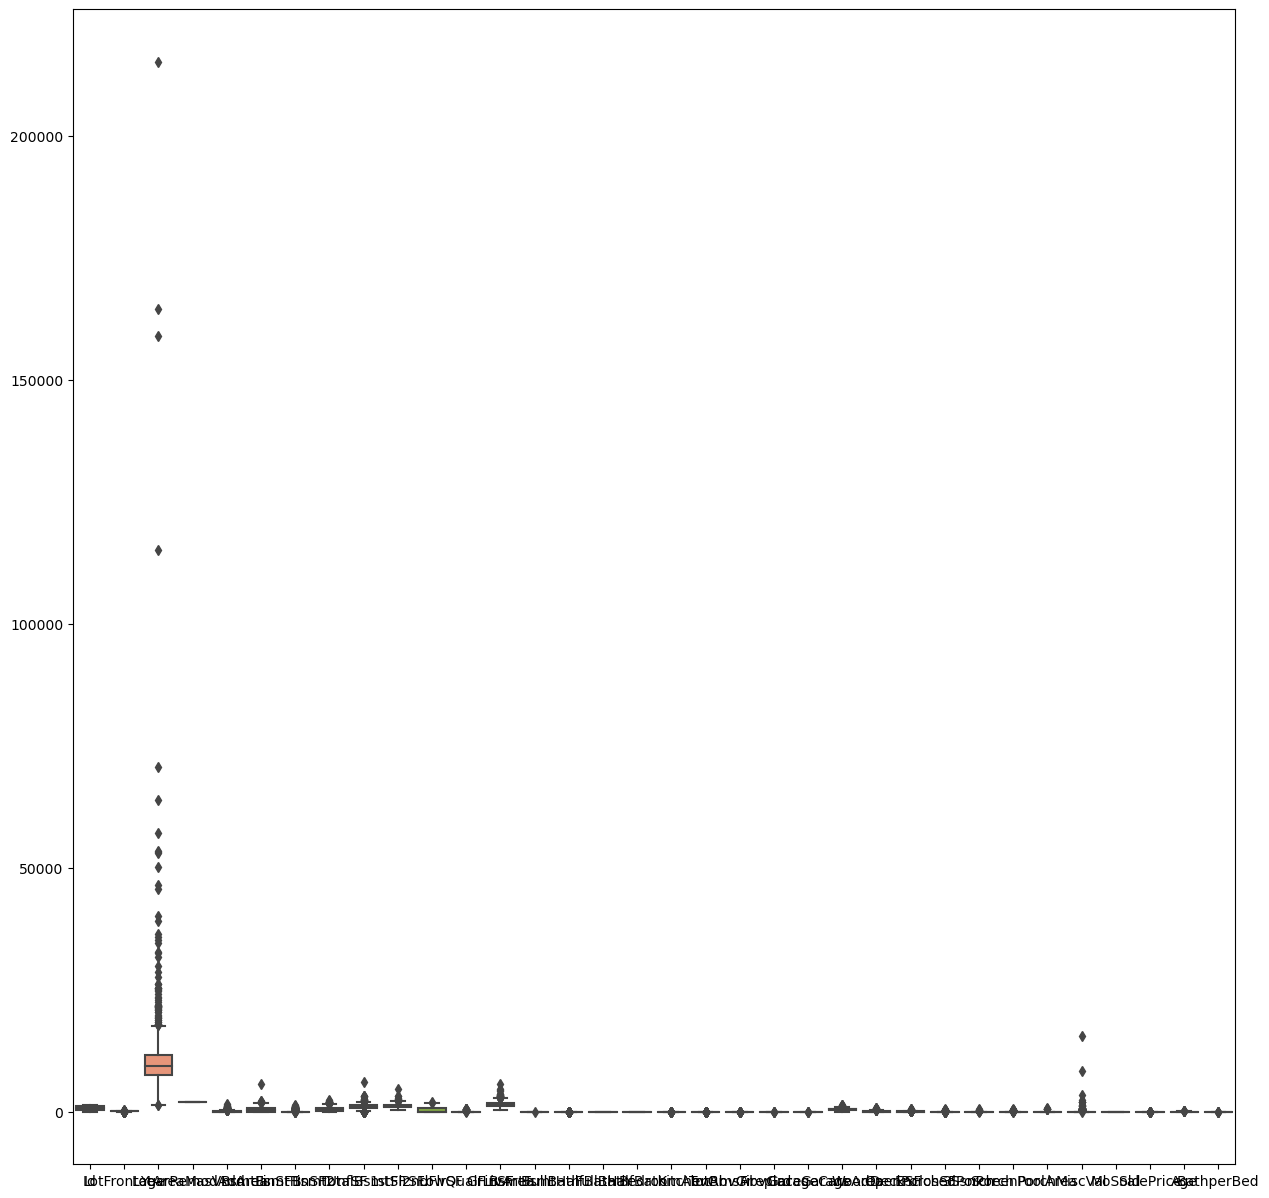

In [25]:
# Outlier treatment for numerical Variables
# Selecting all numerical variable column names
num_col = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=[15,15])
sb.boxplot(data=df[num_col])

# Findings
# There are outliers across variables we shoudl try and remove top and bottom percentiles (trial and error, 2%, 5%, 10%)

In [26]:
# Outlier Treatment
## Capping outliers at Bottom and Top 5% Outliers at 5th and 95th percentile respectively
for c in num_col:
    df[c][df[c] <= df[c].quantile(0.05)] = df[c].quantile(0.05)
    df[c][df[c] >= df[c].quantile(0.95)] = df[c].quantile(0.95)

<Axes: >

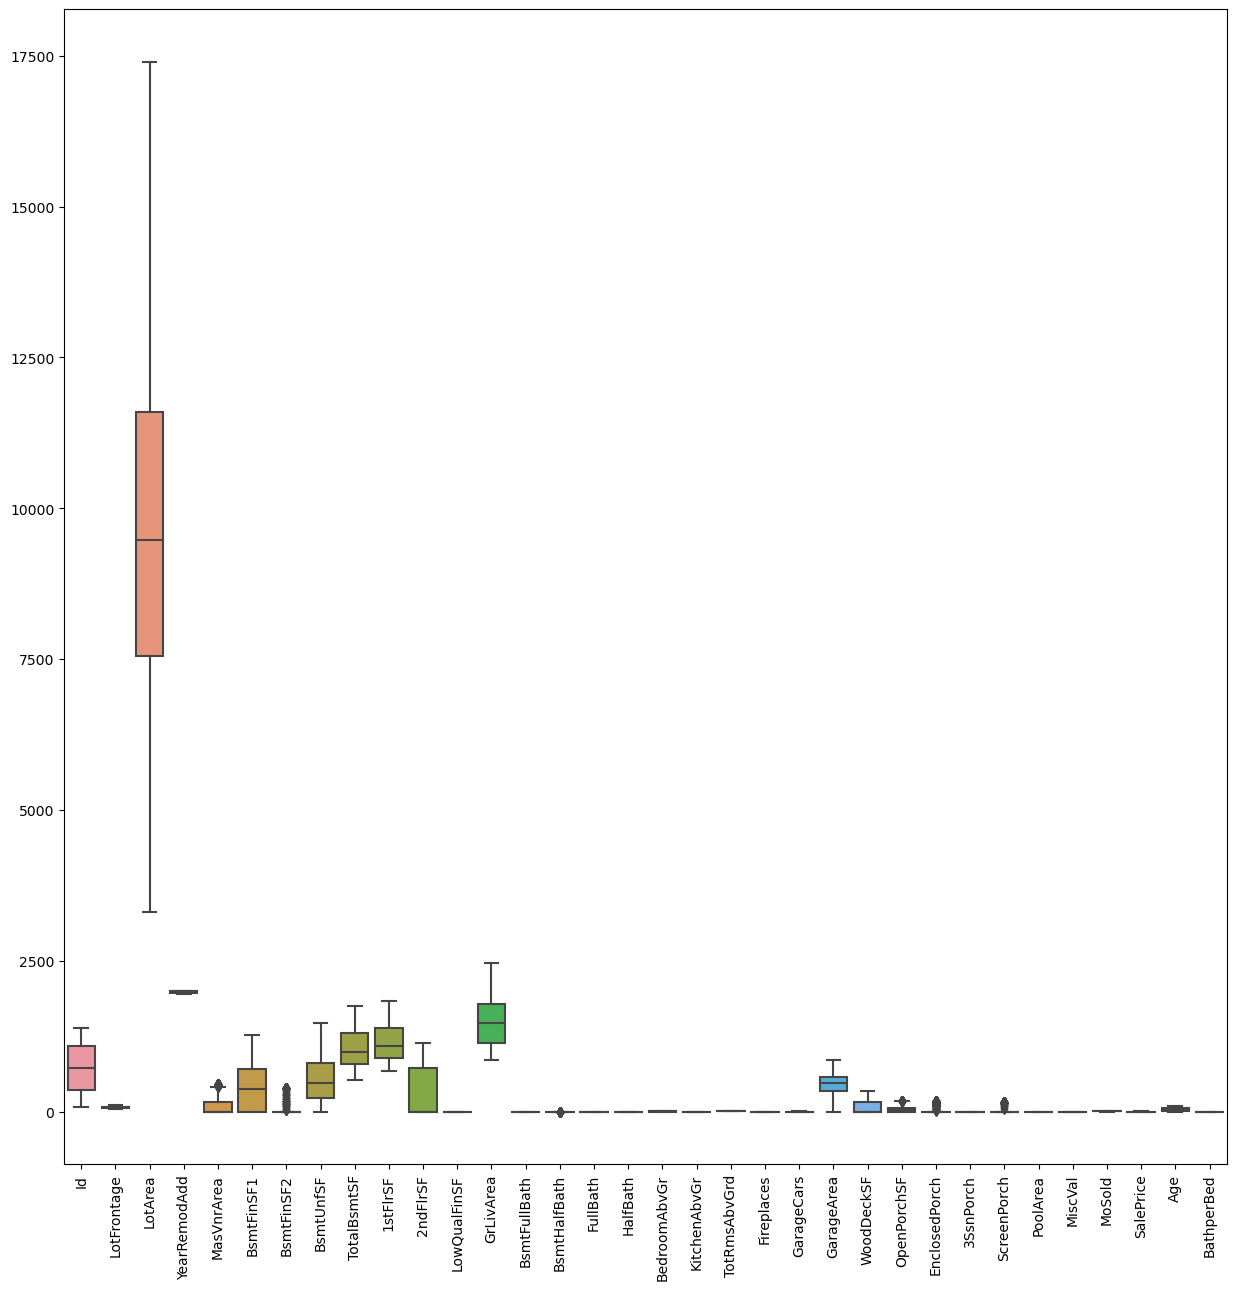

In [27]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sb.boxplot(data=df[num_col])

In [28]:
df.shape

(1460, 81)

In [29]:
# Merging Numrical Variables with Encoded Categorical Variables

df = pd.concat([df[num_col], df_encoded], axis=1)
df.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  73.95         65.0   8450.0          2003       196.0         706   
1  73.95         80.0   9600.0          1976         0.0         978   
2  73.95         68.0  11250.0          2002       162.0         486   
3  73.95         60.0   9550.0          1970         0.0         216   
4  73.95         84.0  14260.0          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0        150        856.0     856.0     854.0             0   
1         0.0        284       1262.0    1262.0       0.0             0   
2         0.0        434        920.0     920.0     866.0             0   
3         0.0        540        756.0     961.0     756.0             0   
4         0.0        490       1145.0    1145.0    1053.0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0             1             0         2         1             3   
1     1262.0             0             1         2         0             3   
2     1786.0             1             0         2         1             3   
3     1717.0             1             0         1         0             3   
4     2198.0             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2       548.0           0   
1             1             6           1           2       460.0         298   
2             1             6           1           2       608.0           0   
3             1             7           1           3       642.0           0   
4             1             9           1           3       836.0         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0           0.00          0            0         0        0   
1          0.0           0.00          0            0         0        0   
2         42.0           0.00          0            0         0        0   
3         35.0         180.15          0            0         0        0   
4         84.0           0.00          0            0         0        0   

   MoSold  SalePrice  Age  BathperBed  MSSubClass_30  MSSubClass_40  \
0       2   2.505338    5    0.666667              0              0   
1       5   2.493950   31    0.666667              0              0   
2       9   2.510994    7    0.666667              0              0   
3       2   2.472277   91    0.333333              0              0   
4      11   2.520050    8    0.500000              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3               0               0               0            0            0   
4        

### Model Building

In [32]:
# Splitting data into X and Y variables (dependent and independent variables)
X = df.drop(["Id", "SalePrice"], axis=1)

y = df["SalePrice"]

In [33]:
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150        856.0     856.0     854.0             0     1710.0   
1        284       1262.0    1262.0       0.0             0     1262.0   
2        434        920.0     920.0     866.0             0     1786.0   
3        540        756.0     961.0     756.0             0     1717.0   
4        490       1145.0    1145.0    1053.0             0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2       548.0           0         61.0   
1             6           1           2       460.0         298          0.0   
2             6           1           2       608.0           0         42.0   
3             7           1           3       642.0           0         35.0   
4             9           1           3       836.0         192         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Age  \
0           0.00          0            0         0        0       2    5   
1           0.00          0            0         0        0       5   31   
2           0.00          0            0         0        0       9    7   
3         180.15          0            0         0        0       2   91   
4           0.00          0            0         0        0      11    8   

   BathperBed  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0    0.666667              0              0              0              0   
1    0.666667              0              0              0              0   
2    0.666667              0              0              0              0   
3    0.333333              0              0              0              0   
4    0.500000              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            0   
3               0        

In [34]:
y.head()

0    2.505338
1    2.493950
2    2.510994
3    2.472277
4    2.520050
Name: SalePrice, dtype: float64

#### Test-Train Split

In [35]:
# Test train split on 20-80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1168, 385)
(1168,)
(292, 385)
(292,)


In [37]:
# Scaling numerical columns

# Selecting all numerical variable column names
num_col1 = X_train.select_dtypes(include=['int64', 'float64']).columns


scaler = StandardScaler()

## Scaling numerical columns in train set 
X_train[num_col1] = scaler.fit_transform(X_train[num_col1])
X_test[num_col1] = scaler.transform(X_test[num_col1])

## Ridge Regression

In [38]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):

    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [39]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.1, 0.3, 0.6, 0.8,1.0,
                    2.0, 4.0,8.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.3, 0.6, 0.8, 1.0, 2.0, 4.0, 8.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
ridgeCV.best_params_

# We will test the model on alpha value of 10

{'alpha': 10.0}

In [41]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.04851851, 0.05017223, 0.05741882, 0.04750381, 0.04475522,
        0.0436482 , 0.04160123, 0.03819871, 0.04228702, 0.03989339,
        0.0368176 , 0.03881707, 0.03952441, 0.03412595]),
 'std_fit_time': array([0.00224322, 0.0053463 , 0.00495931, 0.00488877, 0.00231457,
        0.00323224, 0.00142327, 0.0038927 , 0.00406589, 0.00512946,
        0.00270853, 0.00426147, 0.00320311, 0.00443874]),
 'mean_score_time': array([0.01002884, 0.01107421, 0.00997562, 0.00848446, 0.00758209,
        0.00887389, 0.00741029, 0.0077374 , 0.00752535, 0.00871301,
        0.00716701, 0.0075892 , 0.00749149, 0.00601187]),
 'std_score_time': array([0.00111349, 0.00227216, 0.00201672, 0.00085604, 0.00115274,
        0.00137553, 0.00029628, 0.00055517, 0.00063157, 0.00130423,
        0.0005305 , 0.0003149 , 0.00058537, 0.00159028]),
 'param_alpha': masked_array(data=[0.1, 0.3, 0.6, 0.8, 1.0, 2.0, 4.0, 8.0, 10.0, 20, 50,
                    100, 500, 1000],
              mask=[False, F

In [42]:
ridge = Ridge(alpha=10)

In [43]:
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [44]:
## Get the coefficients of ridge regression model
ridge.coef_

array([ 5.41417646e-04,  1.70958983e-03,  2.11252747e-03, -2.37052213e-04,
        8.10481914e-04, -7.43694354e-06, -1.24099661e-03,  4.29840056e-03,
        6.07846760e-04,  2.43357728e-03,  0.00000000e+00,  7.35073301e-03,
        7.05874364e-04, -2.23189244e-05,  1.42287888e-03,  1.08486723e-03,
        1.22088119e-04,  0.00000000e+00, -7.23221330e-05,  1.58887344e-03,
        1.38871466e-03,  1.41146597e-03,  1.02268919e-03,  6.57836345e-04,
        2.19165742e-04,  0.00000000e+00,  9.19110129e-04,  0.00000000e+00,
        0.00000000e+00, -5.78742063e-05, -4.22611828e-03, -5.91176438e-04,
       -3.63345298e-03,  3.96872131e-04, -6.06372448e-05, -3.67642442e-04,
       -6.27772833e-04,  3.44169414e-03,  2.63663054e-03,  1.34012889e-04,
        4.74786829e-04, -2.78316900e-03,  8.75845335e-04, -4.41144308e-03,
       -9.45250817e-04, -1.41357275e-03,  2.95125859e-03,  1.19837351e-03,
        9.65737083e-04, -2.04518258e-03, -4.60448367e-04, -5.21969881e-04,
        1.52029932e-03,  

In [45]:
## Prediction on Train group
y_train_pred = ridge.predict(X_train)

y_pred = ridge.predict(X_test)

In [46]:
# Check Ridge model metrics (R2, RSS, MSE, RMSE)
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 0.06
RSS (Test) = 0.02
MSE (Train) = 0.00
MSE (Test) = 0.00
RMSE (Train) = 0.01
RMSE (Test) = 0.01


In [47]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.048519      0.002243         0.010029        0.001113         0.1   
1        0.050172      0.005346         0.011074        0.002272         0.3   
2        0.057419      0.004959         0.009976        0.002017         0.6   
3        0.047504      0.004889         0.008484        0.000856         0.8   
4        0.044755      0.002315         0.007582        0.001153         1.0   
5        0.043648      0.003232         0.008874        0.001376         2.0   
6        0.041601      0.001423         0.007410        0.000296         4.0   
7        0.038199      0.003893         0.007737        0.000555         8.0   
8        0.042287      0.004066         0.007525        0.000632        10.0   
9        0.039893      0.005129         0.008713        0.001304          20   
10       0.036818      0.002709         0.007167        0.000531          50   
11       0.038817      0.004261         0.007589        0.000315         100   
12       0.039524      0.003203         0.007491        0.000585         500   
13       0.034126      0.004439         0.006012        0.001590        1000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0    {'alpha': 0.1}          -0.006692          -0.007730          -0.007734   
1    {'alpha': 0.3}          -0.006507          -0.007365          -0.007392   
2    {'alpha': 0.6}          -0.006289          -0.007128          -0.007133   
3    {'alpha': 0.8}          -0.006190          -0.007036          -0.007035   
4    {'alpha': 1.0}          -0.006120          -0.006968          -0.006963   
5    {'alpha': 2.0}          -0.005926          -0.006767          -0.006759   
6    {'alpha': 4.0}          -0.005731          -0.006628          -0.006625   
7    {'alpha': 8.0}          -0.005601          -0.006616          -0.006541   
8   {'alpha': 10.0}          -0.005581          -0.006640          -0.006525   
9     {'alpha': 20}          -0.005620          -0.006766          -0.006602   
10    {'alpha': 50}          -0.005937          -0.007095          -0.006883   
11   {'alpha': 100}          -0.006238          -0.007398          -0.007163   
12   {'alpha': 500}          -0.006846          -0.008424          -0.008087   
13  {'alpha': 1000}          -0.007230          -0.009001          -0.008794   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           -0.007317          -0.007039        -0.007302        0.000403   
1           -0.007114          -0.006793        -0.007034        0.000341   
2           -0.007027          -0.006571        -0.006830        0.000340   
3           -0.006984          -0.006486        -0.006746        0.000347   
4           -0.006945          -0.006419        -0.006683        0.000351   
5           -0.006820          -0.006227        -0.006500        0.000359   
6           -0.006698          -0.006059        -0.006348        0.000385   
7           -0.006611          -0.005924        -0.006259        0.000418   
8           -0.006597          -0.005905        -0.006250        0.000428   
9           -0.006694          -0.005946        -0.006326        0.000458   
10          -0.006987          -0.006115        -0.006603        0.000480   
11          -0.007343          -0.006304        -0.006889        0.000511   
12          -0.008258          -0.007063        -0.007736        0.000650   
13          -0.008876          -0.007629        -0.008306        0.000730   

    rank_test_score  split0_train_score  split1_train_score  \
0                12           -0.004336           -0.004092   
1                11           -0.004412           -0.004202   
2                 9           -0.004478           -0.004278   
3                 8           -0.004512           -0.004313   
4                 7           -0.004543           -0.004341   
5                 5           -0.004647           -0.004438   
6    

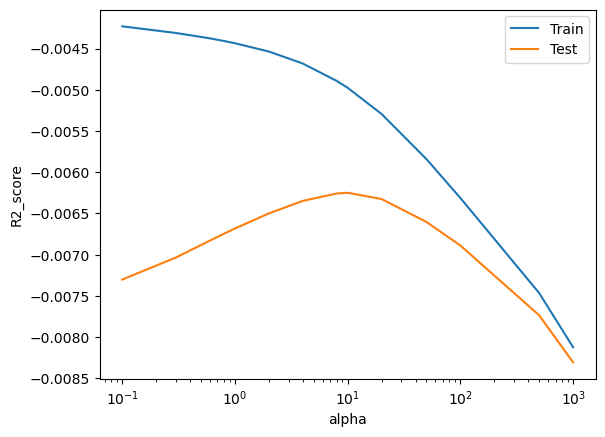

In [48]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

# Optimal value of alpha comes out to be 10

### Lasso Regression

In [49]:

## Now to create a Lasso model

params = {'alpha': [0.001, 0.01, 0.1, 0.3, 0.6, 0.8, 1.0, 2.0, 4.0, 8.0, 10.0,
                                   20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.3, 0.6, 0.8, 1.0, 2.0,
                                   4.0, 8.0, 10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
lassoCV.best_params_

{'alpha': 0.001}

In [51]:
lassoCV.cv_results_

{'mean_fit_time': array([0.0428071 , 0.04071388, 0.02868671, 0.02883658, 0.0257225 ,
        0.035568  , 0.03371   , 0.02535467, 0.02186065, 0.02645664,
        0.02378602, 0.03335595, 0.03841667, 0.02815042, 0.03706603,
        0.02429757]),
 'std_fit_time': array([0.00201501, 0.00115069, 0.00158995, 0.00328746, 0.00317854,
        0.00740487, 0.00691533, 0.0042902 , 0.00182498, 0.00763979,
        0.00279617, 0.01988755, 0.02933819, 0.01080801, 0.01443122,
        0.00105868]),
 'mean_score_time': array([0.01054339, 0.01027279, 0.01020947, 0.00948176, 0.00916076,
        0.01345611, 0.01047959, 0.01214929, 0.00774651, 0.00875025,
        0.00770073, 0.01495409, 0.01393919, 0.01874337, 0.01382356,
        0.00688787]),
 'std_score_time': array([0.00159209, 0.00143424, 0.00185952, 0.00166389, 0.00096676,
        0.00539818, 0.00251917, 0.0054381 , 0.00030464, 0.00066843,
        0.00044447, 0.00948016, 0.00659271, 0.01452777, 0.00871077,
        0.0011478 ]),
 'param_alpha': masked_arr

In [52]:
lasso = Lasso(alpha=0.001)

In [53]:
# Fitting the model
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [54]:

lasso.coef_

array([ 0.00000000e+00,  1.70821866e-03,  4.61268892e-03,  0.00000000e+00,
        2.09166153e-03, -0.00000000e+00, -0.00000000e+00,  4.36771814e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00103518e-02,
        1.41504198e-05, -0.00000000e+00,  0.00000000e+00,  3.80749577e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.33174910e-03,
        2.67147269e-03,  1.68077784e-03,  3.49415125e-04,  4.12267726e-04,
        0.00000000e+00,  0.00000000e+00,  1.73471303e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.47948887e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [55]:
# Predictions on Train set
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [56]:
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.85
R-Squared (Test) = 0.87
RSS (Train) = 0.15
RSS (Test) = 0.03
MSE (Train) = 0.00
MSE (Test) = 0.00
RMSE (Train) = 0.01
RMSE (Test) = 0.01


In [57]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.042807      0.002015         0.010543        0.001592       0.001   
1        0.040714      0.001151         0.010273        0.001434        0.01   
2        0.028687      0.001590         0.010209        0.001860         0.1   
3        0.028837      0.003287         0.009482        0.001664         0.3   
4        0.025723      0.003179         0.009161        0.000967         0.6   
5        0.035568      0.007405         0.013456        0.005398         0.8   
6        0.033710      0.006915         0.010480        0.002519         1.0   
7        0.025355      0.004290         0.012149        0.005438         2.0   
8        0.021861      0.001825         0.007747        0.000305         4.0   
9        0.026457      0.007640         0.008750        0.000668         8.0   
10       0.023786      0.002796         0.007701        0.000444        10.0   
11       0.033356      0.019888         0.014954        0.009480          20   
12       0.038417      0.029338         0.013939        0.006593          50   
13       0.028150      0.010808         0.018743        0.014528         100   
14       0.037066      0.014431         0.013824        0.008711         500   
15       0.024298      0.001059         0.006888        0.001148        1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 0.001}          -0.007692          -0.009306          -0.008549   
1    {'alpha': 0.01}          -0.013480          -0.015348          -0.016764   
2     {'alpha': 0.1}          -0.022840          -0.023738          -0.025600   
3     {'alpha': 0.3}          -0.022840          -0.023738          -0.025600   
4     {'alpha': 0.6}          -0.022840          -0.023738          -0.025600   
5     {'alpha': 0.8}          -0.022840          -0.023738          -0.025600   
6     {'alpha': 1.0}          -0.022840          -0.023738          -0.025600   
7     {'alpha': 2.0}          -0.022840          -0.023738          -0.025600   
8     {'alpha': 4.0}          -0.022840          -0.023738          -0.025600   
9     {'alpha': 8.0}          -0.022840          -0.023738          -0.025600   
10   {'alpha': 10.0}          -0.022840          -0.023738          -0.025600   
11     {'alpha': 20}          -0.022840          -0.023738          -0.025600   
12     {'alpha': 50}          -0.022840          -0.023738          -0.025600   
13    {'alpha': 100}          -0.022840          -0.023738          -0.025600   
14    {'alpha': 500}          -0.022840          -0.023738          -0.025600   
15   {'alpha': 1000}          -0.022840          -0.023738          -0.025600   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           -0.008822          -0.007591        -0.008392        0.000660   
1           -0.015256          -0.013886        -0.014947        0.001169   
2           -0.024201          -0.022285        -0.023733        0.001149   
3           -0.024201          -0.022285        -0.023733        0.001149   
4           -0.024201          -0.022285        -0.023733        0.001149   
5           -0.024201          -0.022285        -0.023733        0.001149   
6           -0.024201          -0.022285        -0.023733        0.001149   
7           -0.024201          -0.022285        -0.023733        0.001149   
8           -0.024201          -0.022285        -0.023733        0.001149   
9           -0.024201          -0.022285        -0.023733        0.001149   
10          -0.024201          -0.022285        -0.023733        0.001149   
11          -0.024201          -0.022285        -0.023733        0.001149   
12          -0.024201          -0.022285        -0.023733        0.001149   
13          -0.024201          -0.022285        -0.023733        0.001149   
14          -0.024201          -0.022285        -0.023733        0.001149   
15          -0.024201          -0

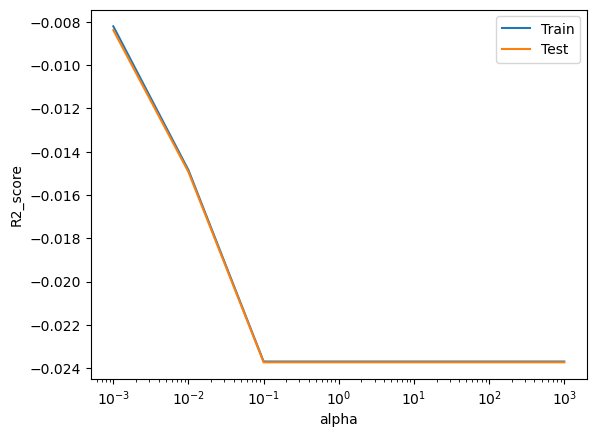

In [58]:
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()


# Findings
# As value of Alpha increases, error decreases and stabilizes post 0.1

In [59]:
### Lasso vs Ridge model comparison
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

# Findings
# R-Sq for Ridge regression is 92% compared to 87% for Lasso

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)          0.939586          0.846270
R2 Score (Test)           0.925962          0.872435
RSS (Train)               0.059296          0.150886
RSS (Test)                0.019929          0.034337
MSE (Train)               0.000051          0.000129
MSE (Test)                0.000068          0.000118
RMSE (Train)              0.007125          0.011366
RMSE (Test)               0.008261          0.010844

In [61]:
# Coefficient changes post Regularization for Ridge and Lasso
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas[betas['Ridge']!=0]

Ridge     Lasso
LotFrontage                  0.000541  0.000000
LotArea                      0.001710  0.001708
YearRemodAdd                 0.002113  0.004613
MasVnrArea                  -0.000237  0.000000
BsmtFinSF1                   0.000810  0.002092
BsmtFinSF2                  -0.000007 -0.000000
BsmtUnfSF                   -0.001241 -0.000000
TotalBsmtSF                  0.004298  0.004368
1stFlrSF                     0.000608  0.000000
2ndFlrSF                     0.002434  0.000000
GrLivArea                    0.007351  0.010010
BsmtFullBath                 0.000706  0.000014
BsmtHalfBath                -0.000022 -0.000000
FullBath                     0.001423  0.000000
HalfBath                     0.001085  0.000381
BedroomAbvGr                 0.000122  0.000000
TotRmsAbvGrd                -0.000072  0.000000
Fireplaces                   0.001589  0.003332
GarageCars                   0.001389  0.002671
GarageArea                   0.001411  0.001681
WoodDeckSF                   0.001023  0.000349
OpenPorchSF                  0.000658  0.000412
EnclosedPorch                0.000219  0.000000
ScreenPorch                  0.000919  0.000173
MoSold                      -0.000058  0.000000
Age                         -0.004226 -0.005479
BathperBed                  -0.000591  0.000000
MSSubClass_30               -0.003633 -0.000000
MSSubClass_40                0.000397  0.000000
MSSubClass_45               -0.000061  0.000000
MSSubClass_50               -0.000368 -0.000000
MSSubClass_60               -0.000628  0.000000
MSSubClass_70                0.003442  0.000000
MSSubClass_75                0.002637  0.000000
MSSubClass_80                0.000134  0.000000
MSSubClass_85                0.000475  0.000000
MSSubClass_90               -0.002783 -0.000000
MSSubClass_120               0.000876  0.000000
MSSubClass_160              -0.004411 -0.000000
MSSubClass_180              -0.000945 -0.000000
MSSubClass_190              -0.001414 -0.000000
MSZoning_FV                  0.002951  0.000000
MSZoning_RH                  0.001198 -0.000000
MSZoning_RL                  0.000966  0.000000
MSZoning_RM                 -0.002045 -0.000000
Street_Pave                 -0.000460  0.000000
Alley_Not applicable        -0.000522  0.000000
Alley_Pave                   0.001520  0.000000
LotShape_IR2                 0.000926  0.000000
LotShape_IR3                -0.001813 -0.000000
LotShape_Reg                 0.000010 -0.000000
LandContour_HLS              0.002676  0.000000
LandContour_Low              0.001086  0.000000
LandContour_Lvl              0.001269 -0.000000
Utilities_NoSeWa            -0.001045 -0.000000
LotConfig_CulDSac            0.002126  0.000000
LotConfig_FR2               -0.001611 -0.000000
LotConfig_FR3               -0.000362  0.000000
LotConfig_Inside            -0.000091 -0.000000
LandSlope_Mod               -0.000416  0.000000
LandSlope_Sev                0.002663  0.000000
Neighborhood_Blueste        -0.000395 -0.000000
Neighborhood_BrDale         -0.000426 -0.000000
Neighborhood_BrkSide         0.002848  0.000000
Neighborhood_ClearCr         0.002472  0.000000
Neighborhood_CollgCr        -0.001288  0.000000
Neighborhood_Crawfor         0.006325  0.000000
Neighborhood_Edwards        -0.004186 -0.000000
Neighborhood_Gilbert        -0.000761 -0.000000
Neighborhood_IDOTRR          0.000367 -0.000000
Neighborhood_MeadowV        -0.005762 -0.000000
Neighborhood_Mitchel        -0.002624 -0.000000
Neighborhood_NAmes          -0.002352 -0.000000
Neighborhood_NPkVill         0.000879 -0.000000
Neighborhood_NWAmes         -0.001811 -0.000000
Neighborhood_NoRidge         0.000414  0.000000
Neighborhood_NridgHt         0.003152  0.000000
Neighborhood_OldTown        -0.001950 -0.000000
Neighborhood_SWISU           0.000629  0.000000
Neighborhood_Sawyer         -0.001462 -0.000000
Neighborhood_SawyerW        -0.001621 -0.000000
Neighborhood_Somerst         0.002548  0.000000
Neighborhood_StoneBr         0.003921  0.000000


In [62]:
# Feature selection performed by Ridge and Lasso
print(betas[betas['Ridge']==0].shape)
print(betas[betas['Lasso']==0].shape)

# Findings


(10, 2)
(369, 2)


In [64]:
# Selecting to 15 Features from Ridge model
betas['Ridge'].sort_values(ascending=False)[:15]

GrLivArea               0.007351
OverallQual_9           0.006410
Neighborhood_Crawfor    0.006325
OverallQual_8           0.006264
OverallCond_9           0.006220
Functional_Typ          0.005627
Exterior1st_BrkFace     0.005606
SaleCondition_Alloca    0.005372
CentralAir_Y            0.004710
TotalBsmtSF             0.004298
BsmtCond_Gd             0.004065
Neighborhood_StoneBr    0.003921
OverallCond_7           0.003819
OverallCond_8           0.003618
MSSubClass_70           0.003442
Name: Ridge, dtype: float64

In [65]:
# Selecting to 15 Features from Lasso model
betas['Lasso'].sort_values(ascending=False)[:15]

GrLivArea           0.010010
YearRemodAdd        0.004613
TotalBsmtSF         0.004368
Fireplaces          0.003332
GarageCars          0.002671
BsmtFinSF1          0.002092
LotArea             0.001708
GarageArea          0.001681
OpenPorchSF         0.000412
HalfBath            0.000381
WoodDeckSF          0.000349
ScreenPorch         0.000173
BsmtFullBath        0.000014
GarageYrBlt_1926    0.000000
GarageYrBlt_1925    0.000000
Name: Lasso, dtype: float64

In [67]:
# Taking exponent of coefficient
ridge_coef = np.exp(betas['Ridge'])
print(ridge_coef.sort_values(ascending=False)[:15])

lasso_coef = np.exp(betas['Lasso'])
print(lasso_coef.sort_values(ascending=False)[:15])

GrLivArea               1.007378
OverallQual_9           1.006430
Neighborhood_Crawfor    1.006345
OverallQual_8           1.006284
OverallCond_9           1.006239
Functional_Typ          1.005643
Exterior1st_BrkFace     1.005621
SaleCondition_Alloca    1.005386
CentralAir_Y            1.004721
TotalBsmtSF             1.004308
BsmtCond_Gd             1.004073
Neighborhood_StoneBr    1.003928
OverallCond_7           1.003826
OverallCond_8           1.003624
MSSubClass_70           1.003448
Name: Ridge, dtype: float64
GrLivArea           1.010061
YearRemodAdd        1.004623
TotalBsmtSF         1.004377
Fireplaces          1.003337
GarageCars          1.002675
BsmtFinSF1          1.002094
LotArea             1.001710
GarageArea          1.001682
OpenPorchSF         1.000412
HalfBath            1.000381
WoodDeckSF          1.000349
ScreenPorch         1.000173
BsmtFullBath        1.000014
GarageYrBlt_1926    1.000000
GarageYrBlt_1925    1.000000
Name: Lasso, dtype: float64


### Final Features that are important in determining prices


In [69]:
betas['Ridge'].sort_values(ascending=False)[:15]

OverallQual_9           0.006410
Neighborhood_Crawfor    0.006325
OverallQual_8           0.006264
OverallCond_9           0.006220
Functional_Typ          0.005627
Exterior1st_BrkFace     0.005606
SaleCondition_Alloca    0.005372
CentralAir_Y            0.004710
TotalBsmtSF             0.004298
BsmtCond_Gd             0.004065
Neighborhood_StoneBr    0.003921
OverallCond_7           0.003819
OverallCond_8           0.003618
MSSubClass_70           0.003442
Name: Ridge, dtype: float64

### Subjective Question answers


### Question 1
#### Optimal Alpha value for Ridge: 10
#### Optimal Alpha value for Lasso: 0.001

In [71]:
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.93
RSS (Train) = 0.07
RSS (Test) = 0.02
MSE (Train) = 0.00
MSE (Test) = 0.00
RMSE (Train) = 0.01
RMSE (Test) = 0.01


In [72]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.83
R-Squared (Test) = 0.86
RSS (Train) = 0.17
RSS (Test) = 0.04
MSE (Train) = 0.00
MSE (Test) = 0.00
RMSE (Train) = 0.01
RMSE (Test) = 0.01


In [73]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [75]:
# Taking exponent of coefficient
ridge_coef = np.exp(betas['Ridge'])
print(ridge_coef.sort_values(ascending=False)[:15])

lasso_coef = np.exp(betas['Lasso'])
print(lasso_coef.sort_values(ascending=False)[:15])

GrLivArea               1.006681
OverallQual_8           1.005682
Neighborhood_Crawfor    1.005363
Functional_Typ          1.005166
OverallQual_9           1.005150
Exterior1st_BrkFace     1.004774
OverallCond_9           1.004537
CentralAir_Y            1.004148
TotalBsmtSF             1.003989
OverallCond_7           1.003513
SaleCondition_Alloca    1.003239
MSSubClass_70           1.003237
BsmtCond_Gd             1.003232
OverallCond_8           1.002948
Neighborhood_StoneBr    1.002936
Name: Ridge, dtype: float64
GrLivArea           1.010396
YearRemodAdd        1.004679
TotalBsmtSF         1.004469
Fireplaces          1.003015
GarageCars          1.002705
GarageArea          1.001670
BsmtFinSF1          1.001396
LotArea             1.001093
GarageYrBlt_1922    1.000000
GarageYrBlt_1923    1.000000
GarageYrBlt_1924    1.000000
LotFrontage         1.000000
GarageYrBlt_1925    1.000000
GarageYrBlt_1921    1.000000
GarageYrBlt_1927    1.000000
Name: Lasso, dtype: float64


### Question 2
#### You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

### Answer
#### Ridge Regression has a higher R-sq for Train as well as test set at 92% compared to Lasso at 87%. 
#### However, as Lasso  Regression reduces the features significantly, to less than 15, it's less complex and hence chances of performing better on useen data is higher
#### For this reason we will be using Lasso Regression Model

### Question 3
#### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [79]:
## List of top 5 lasso features to be removed from Train and Test dataset
top5_lasso = ['GrLivArea', 'YearRemodAdd', 'TotalBsmtSF', 'Fireplaces', 'GarageCars']
X_train_dropped = X_train.drop(top5_lasso, axis=1)
X_test_dropped = X_test.drop(top5_lasso, axis=1)

In [80]:

## Now to create a Lasso model

params = {'alpha': [0.001, 0.01, 0.1, 0.3, 0.6, 0.8, 1.0, 2.0, 4.0, 8.0, 10.0,
                                   20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.3, 0.6, 0.8, 1.0, 2.0,
                                   4.0, 8.0, 10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
# Optimal Alpha
lassoCV.best_params_

{'alpha': 0.001}

In [83]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [85]:
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.83
R-Squared (Test) = 0.85
RSS (Train) = 0.17
RSS (Test) = 0.04
MSE (Train) = 0.00
MSE (Test) = 0.00
RMSE (Train) = 0.01
RMSE (Test) = 0.01


In [91]:
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X.columns


betas['Lasso'] = lasso.coef_
betas['Lasso'].sort_values(ascending=False)[:5]

1stFlrSF      0.008581
2ndFlrSF      0.006938
GarageArea    0.004283
BsmtFinSF1    0.003227
LotArea       0.002661
Name: Lasso, dtype: float64